# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from scipy import stats
from matplotlib import pyplot as plt
from matplotlib import gridspec
from geopy.geocoders import Nominatim

# 1.0. Exploratory Data Analysis

In [2]:
#Dataset upload from URL
url = 'https://raw.githubusercontent.com/lucasquemelli/House_Rocket/main/kc_house_data.csv'
data = pd.read_csv(url)

## 1.1. Data Description

In [3]:
#Visualization of the first 05 rows
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
def data_shape(data):
    print("Shape of the dataset")
    print("\nNumber of rows: {}\nNumber of columns: {}".format(data.shape[0],data.shape[1]))
    
    return None

def num_attributes(data):
    num_attributes = len(data.columns) - 2
    print("\n\nThe number of attribute is:", num_attributes)
    
    return num_attributes

def attributes(data):
    attributes = data.drop(['id','date'], axis=1)
    print("\n\nThe attributes are:\n\n",attributes.columns.tolist())
    
    return attributes

def data_info(data):
    print("\n\nData types\n")
    data.info()
    
    return None

def descriptive_analysis(data):
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    print("\n\nDescriptive analysis:\n\n",data.describe().T)
    
    return None

def display(data):
    #Displaying unique values for the number of bedrooms, bathrooms, floors, waterfront, view, condition and grade
    print("\n\nAttributes unique values")
    print("\n\nUnique values for bedrooms:", np.sort(data['bedrooms'].unique())) 
    print("\nUnique values for bathrooms:", np.sort(data['bathrooms'].unique()))
    print("\nUnique values for floors:", np.sort(data['floors'].unique()))
    print("\nUnique values for waterfront:", np.sort(data['waterfront'].unique()))
    print("\nUnique values for view:", np.sort(data['view'].unique()))
    print("\nUnique values for condition:", np.sort(data['condition'].unique()))
    print("\nUnique values for grade:", np.sort(data['grade'].unique()))

    print("\n\nWhile there are properties with 33 bedrooms, also are there with 0. The same happens with the number of bathrooms. This would properly be classified as inconsistences, yet I choose to classify into different types of properties in this analysis.")
    print("\n\nThe other attributes contain a large number of unique values, such as 'id' - as it may be seen below. Thus, they were not considered in this analysis.")

    print("\n\nNumber of unique values for 'id':", data['id'].nunique())
    print("\n\nWhile the number of rows is 21613, the number of unique 'id' is 21436. It means there are only 21436 properties.")
    
    return None

if __name__ == '__main__':
    
    data_shape(data)
    
    num_attributes = num_attributes(data)
    
    attributes = attributes(data)
    
    data_info(data)
    
    descriptive_analysis(data)
    
    display(data)

Shape of the dataset

Number of rows: 21613
Number of columns: 21


The number of attribute is: 19


The attributes are:

 ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  in

**Meaning of the attributes**

- ID: identification number
- date: period in which the properties were available
- bedrooms: number of bedrooms
- bathrooms: number of bathrooms
- floors: number of floors
- waterfront: if some property has waterfront or not (0 or 1)
- view: number of views
- condition: condition of the properties (1 to 5)
- grade: quality of the building and construction level
- price: price of the property
- sqft_living: living room built area [ft²]
- sqft_lot: lot area [ft²]
- sqft_above: built area above ground level [ft²]
- sqft_basement: built basement area [ft²]
- yr_built: year that the property was built
- yr_renovated: year of renovation
- sqft_living15: average built area of the 15 nearest neighboring properties [ft²]
- sqft_lot15: average lot area of the 15 nearest neighboring properties [ft²]
- zipcode: number of zipcode
- lat: latitude identification number
- long: longitude identification number

## 1.2. Data Cleaning

In [5]:
def missing_values(data):
    print("Missing values\n")
    print(data.isna().sum())
    
    return None

def ids(data):
    ids = data['id']
    
    return ids

def duplicates_id(data):
    print("\n\nDuplicates\n")
    print(data[ids.isin(ids[ids.duplicated()])].sort_values('id'))
    
    return None

if __name__ == '__main__':
    
    missing_values(data)
    
    ids = ids(data)
    
    duplicates_id(data)

Missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Duplicates

               id             date     price  bedrooms  bathrooms  \
2497      1000102  20150422T000000 300000.00         6       3.00   
2496      1000102  20140916T000000 280000.00         6       3.00   
16814     7200179  20141016T000000 150000.00         2       1.00   
16815     7200179  20150424T000000 175000.00         2       1.00   
11434   109200390  20141020T000000 250000.00         3       1.75   
...           ...              ...       ...       ...        ...   
6345   9828200460  20140627T000000 260000.00         2       1.00   
15200 

Duplicates (353) in this dataset are meant to be properties which were sold twice or more between 2014 and 2015. These properties were sold on different dates and at different prices. It means the price changes with time. 

It is important to mention that the number of duplicates is different from the number of ids that are duplicates. Notice that the same id appears twice or more. Thus, the number of ids that are duplicate is: total number of rows - number of unique ids = 177.

## 1.3. Data Conversion

In [6]:
#Conversiong to datetime
data['date'] =  pd.to_datetime(data['date'])

## 1.4. Outliers 

We may have a look at the outliers in the dataset using the boxplot chart. However, as it may be seen below, this is an univariate analysis. As the price is influenced by a lot of features in the dataset, we must remove outliers using multivariate analysis. 

Text(0, 0.5, 'Price (USD)')

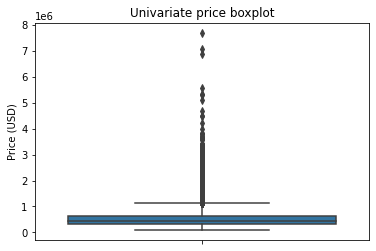

In [7]:
ax = sns.boxplot(y='price',data=data)
ax.set_title("Univariate price boxplot")
ax.set_ylabel("Price (USD)")

To remove outliers using multivariate analysis, we are going to use three methods: **visual method**, **Z-score method** and **interquartile range method**. Then, we are going to work *separately* with each resulting dataset and make conclusions.  

Firstly, in order to use the methods **Z-score** and **interquartile range**, we have to set the column 'date' as integer as follows:

In [8]:
#Setting the feature 'date' as integer (type 1)
df1 = data
df1['date'] = df1['date'].astype(np.int64)

C:\Users\USURIO~3\AppData\Local\Temp/ipykernel_22044/2274023451.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df1['date'] = df1['date'].astype(np.int64)


In [9]:
#Setting the feature 'date' as integer (type 2)
df1 = data
df1['date'] = df1['date'].view(np.int64)

The dataset df1 is the same in the two cases above. It was only treated with two different "set as integer" functions.

### 1.4.1. Visual method

In [10]:
#Properties with the highest prices
data.sort_values('price', ascending=False).head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,1413158400000000000,7700000.00,6,8.00,12050,27600,2.50,0,3,...,13,8570,3480,1910,1987,98102,47.63,-122.32,3940,8800
3914,9808700762,1402444800000000000,7062500.00,5,4.50,10040,37325,2.00,1,2,...,11,7680,2360,1940,2001,98004,47.65,-122.21,3930,25449
9254,9208900037,1411084800000000000,6885000.00,6,7.75,9890,31374,2.00,0,4,...,13,8860,1030,2001,0,98039,47.63,-122.24,4540,42730
4411,2470100110,1407110400000000000,5570000.00,5,5.75,9200,35069,2.00,0,0,...,13,6200,3000,2001,0,98039,47.63,-122.23,3560,24345
1448,8907500070,1428883200000000000,5350000.00,5,5.00,8000,23985,2.00,0,4,...,12,6720,1280,2009,0,98004,47.62,-122.22,4600,21750
1315,7558700030,1428883200000000000,5300000.00,6,6.00,7390,24829,2.00,1,4,...,12,5000,2390,1991,0,98040,47.56,-122.21,4320,24619
1164,1247600105,1413763200000000000,5110800.00,5,5.25,8010,45517,2.00,1,4,...,12,5990,2020,1999,0,98033,47.68,-122.21,3430,26788
8092,1924059029,1402963200000000000,4668000.00,5,6.75,9640,13068,1.00,1,4,...,12,4820,4820,1983,2009,98040,47.56,-122.21,3270,10454
2626,7738500731,1408060800000000000,4500000.00,5,5.50,6640,40014,2.00,1,4,...,12,6350,290,2004,0,98155,47.75,-122.28,3030,23408
8638,3835500195,1403049600000000000,4489000.00,4,3.00,6430,27517,2.00,0,0,...,12,6430,0,2001,0,98004,47.62,-122.22,3720,14592


The properties with the highest prices have such values due to their features. No anomalies were found to be considered as outliers. 

In [11]:
#Properties with 10 or more than 10 bedrooms
data[data['bedrooms'] >= 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,1408579200000000000,520000.00,11,3.00,3000,4960,2.00,0,0,...,7,2400,600,1918,1999,98106,47.56,-122.36,1420,4960
13314,627300145,1407974400000000000,1148000.00,10,5.25,4590,10920,1.00,0,2,...,9,2500,2090,2008,0,98004,47.59,-122.11,2730,10400
15161,5566100170,1414540800000000000,650000.00,10,2.00,3610,11914,2.00,0,0,...,7,3010,600,1958,0,98006,47.57,-122.17,2040,11914
15870,2402100895,1403654400000000000,640000.00,33,1.75,1620,6000,1.00,0,0,...,7,1040,580,1947,0,98103,47.69,-122.33,1330,4700
19254,8812401450,1419811200000000000,660000.00,10,3.00,2920,3745,2.00,0,0,...,7,1860,1060,1913,0,98105,47.66,-122.32,1810,3745


The prices of the properties above are all feasible with their features. Although perhaps the 11-bedrooms and the 33-bedrooms properties prices may be seen as anomalies, they will not be treated as outliers due to their year built (yr_built) and total area (sqft_lot). Some of their features may be atypical because of the time they were built and localization.  

In [12]:
#Properties with no bedrooms
data[data['bedrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,1402531200000000000,1095000.00,0,0.00,3064,4764,3.50,0,2,...,7,3064,0,1990,0,98102,47.64,-122.32,2360,4000
3119,3918400017,1423094400000000000,380000.00,0,0.00,1470,979,3.00,0,2,...,8,1470,0,2006,0,98133,47.71,-122.36,1470,1399
3467,1453602309,1407196800000000000,288000.00,0,1.50,1430,1650,3.00,0,0,...,7,1430,0,1999,0,98125,47.72,-122.29,1430,1650
4868,6896300380,1412208000000000000,228000.00,0,1.00,390,5900,1.00,0,0,...,4,390,0,1953,0,98118,47.53,-122.26,2170,6000
6994,2954400190,1403568000000000000,1295650.00,0,0.00,4810,28008,2.00,0,0,...,12,4810,0,1990,0,98053,47.66,-122.07,4740,35061
8477,2569500210,1416182400000000000,339950.00,0,2.50,2290,8319,2.00,0,0,...,8,2290,0,1985,0,98042,47.35,-122.15,2500,8751
8484,2310060040,1411603200000000000,240000.00,0,2.50,1810,5669,2.00,0,0,...,7,1810,0,2003,0,98038,47.35,-122.05,1810,5685
9773,3374500520,1430265600000000000,355000.00,0,0.00,2460,8049,2.00,0,0,...,8,2460,0,1990,0,98031,47.41,-122.17,2520,8050
9854,7849202190,1419292800000000000,235000.00,0,0.00,1470,4800,2.00,0,0,...,7,1470,0,1996,0,98065,47.53,-121.83,1060,7200
12653,7849202299,1424217600000000000,320000.00,0,2.50,1490,7111,2.00,0,0,...,7,1490,0,1999,0,98065,47.53,-121.83,1500,4675


Although some properties have no bedrooms, they may be treated as studios and not as apartments or even houses. They are considered like this and not as outliers due to requests from the House Rocket's CEO. 

In [13]:
#Properties with 6 or more than 6 bathrooms
data[data['bathrooms'] >= 6]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1315,7558700030,1428883200000000000,5300000.00,6,6.00,7390,24829,2.00,1,4,...,12,5000,2390,1991,0,98040,47.56,-122.21,4320,24619
4024,9175600025,1412640000000000000,800000.00,7,6.75,7480,41664,2.00,0,2,...,11,5080,2400,1953,0,98166,47.46,-122.37,2810,33190
4035,685000115,1412640000000000000,2150000.00,8,6.00,4340,9415,2.00,0,0,...,8,4340,0,1967,0,98004,47.63,-122.20,2050,9100
7252,6762700020,1413158400000000000,7700000.00,6,8.00,12050,27600,2.50,0,3,...,13,8570,3480,1910,1987,98102,47.63,-122.32,3940,8800
8092,1924059029,1402963200000000000,4668000.00,5,6.75,9640,13068,1.00,1,4,...,12,4820,4820,1983,2009,98040,47.56,-122.21,3270,10454
8546,424049043,1407715200000000000,450000.00,9,7.50,4050,6504,2.00,0,0,...,7,4050,0,1996,0,98144,47.59,-122.30,1448,3866
9254,9208900037,1411084800000000000,6885000.00,6,7.75,9890,31374,2.00,0,4,...,13,8860,1030,2001,0,98039,47.63,-122.24,4540,42730
12370,6065300370,1430870400000000000,4208000.00,5,6.00,7440,21540,2.00,0,0,...,12,5550,1890,2003,0,98006,47.57,-122.19,4740,19329
12777,1225069038,1399248000000000000,2280000.00,7,8.00,13540,307752,3.00,0,4,...,12,9410,4130,1999,0,98053,47.67,-121.99,4850,217800
14556,2303900035,1402444800000000000,2888000.00,5,6.25,8670,64033,2.00,0,4,...,13,6120,2550,1965,2003,98177,47.73,-122.37,4140,81021


The prices of the properties above are all consistent with their features. Thus, they will not be treated as outliers.

In [14]:
#Properties with no bathrooms
data[data['bathrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,1402531200000000000,1095000.00,0,0.00,3064,4764,3.50,0,2,...,7,3064,0,1990,0,98102,47.64,-122.32,2360,4000
1149,3421079032,1424131200000000000,75000.00,1,0.00,670,43377,1.00,0,0,...,3,670,0,1966,0,98022,47.26,-121.91,1160,42882
3119,3918400017,1423094400000000000,380000.00,0,0.00,1470,979,3.00,0,2,...,8,1470,0,2006,0,98133,47.71,-122.36,1470,1399
5832,5702500050,1415059200000000000,280000.00,1,0.00,600,24501,1.00,0,0,...,3,600,0,1950,0,98045,47.53,-121.75,990,22549
6994,2954400190,1403568000000000000,1295650.00,0,0.00,4810,28008,2.00,0,0,...,12,4810,0,1990,0,98053,47.66,-122.07,4740,35061
9773,3374500520,1430265600000000000,355000.00,0,0.00,2460,8049,2.00,0,0,...,8,2460,0,1990,0,98031,47.41,-122.17,2520,8050
9854,7849202190,1419292800000000000,235000.00,0,0.00,1470,4800,2.00,0,0,...,7,1470,0,1996,0,98065,47.53,-121.83,1060,7200
10481,203100435,1410998400000000000,484000.00,1,0.00,690,23244,1.00,0,0,...,7,690,0,1948,0,98053,47.64,-121.95,1690,19290
14423,9543000205,1428883200000000000,139950.00,0,0.00,844,4269,1.00,0,0,...,7,844,0,1913,0,98001,47.28,-122.25,1380,9600
19452,3980300371,1411689600000000000,142000.00,0,0.00,290,20875,1.00,0,0,...,1,290,0,1963,0,98024,47.53,-121.89,1620,22850


The properties above - with no bathrooms - will be treated as outliers, since there is not a classification for them. Assuming they are a typo, these rows will be removed. 

#### 1.4.1.1 Dropouts

In [15]:
def drop_rows(data):
    data = data.drop(data[data['bathrooms'] == 0].index)
    
    return data

def reset_index(data):
    data = data.reset_index(drop=True)
    dataset = data.copy()
    
    return data, dataset

def show_dimensions(data):
    print(f"Clean dataset: {data.shape[0]} properties (rows), {data.shape[1]} features (columns).")
    
    return None

if __name__ == '__main__':
    
    data = drop_rows(data)
    
    data, dataset = reset_index(data)
    
    show_dimensions(data)

Clean dataset: 21603 properties (rows), 21 features (columns).


### 1.4.2. Z-score method

"The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured."

"The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution."

"Calculating the Z-score, we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers." 

In this case (project), a threshold of 3 was used. For instance, when the Z-score value was greater than 3, that data point was identified as an outlier.

In [16]:
def standardization_data(df1):
    z1 = np.abs(stats.zscore(df1))
    print("Standardized dataset:\n\n", z1)
    
    return z1

def show_index_outliers(z1):
    #Defining threshold as 3
    threshold = 3
    
    print("\n\nIndexes of the outliers:\n\n",np.where(z1 > 3))
    
    return None

def show_first_outlier(z1):
    print("\n\nValue of the first outlier:\n\n",z1.iloc[1][15])
    
    return None

def removing_outliers(df1, z1):
    df2 = df1[(z1 < 3).all(axis=1)]
    
    return df2

def show_new_shape(df2):
    print("\n\nShape of the clean dataset:\n\nNumber of rows:", df2.shape[0])
    print("Number of columns:", df2.shape[1])
    
    return None

if __name__ == '__main__':
    
    z1 = standardization_data(df1)
    
    show_index_outliers(z1)
    
    show_first_outlier(z1)
    
    df2 = removing_outliers(df1, z1)
    
    show_new_shape(df2)

Standardized dataset:

         id  date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     0.89  0.14   0.87      0.40       1.45         0.98      0.23    0.92   
1     0.64  0.36   0.01      0.40       0.18         0.53      0.19    0.94   
2     0.37  1.05   0.98      1.47       1.45         1.43      0.12    0.92   
3     0.73  0.36   0.17      0.68       1.15         0.13      0.24    0.92   
4     0.91  0.99   0.08      0.40       0.15         0.44      0.17    0.92   
...    ...   ...    ...       ...        ...          ...       ...     ...   
21608 1.50  1.43   0.49      0.40       0.50         0.60      0.34    2.79   
21609 0.70  1.03   0.38      0.68       0.50         0.25      0.22    0.94   
21610 1.06  1.13   0.38      1.47       1.77         1.15      0.33    0.94   
21611 1.49  0.70   0.38      0.40       0.50         0.52      0.31    0.94   
21612 1.06  0.13   0.59      1.47       1.77         1.15      0.34    0.94   

       waterfront  view  ..

### 1.4.3. Interquartile range (IQR) method

Box plot use the IQR method to display data and outliers(shape of the data). The interquartile range (IQR) is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

"It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers."

In [17]:
def quartiles(df1):
    Q1 = df1.quantile(0.25)
    Q3 = df1.quantile(0.75)
    
    return Q1, Q3

def IQR_function(Q1, Q3):
    IQR = Q3 - Q1
    print("Interquartile range:\n\n",IQR)
    
    return IQR

def show_boolean_outliers(df1, Q1, Q3, IQR):
    print("\n\nBoolean values:\n\n",(df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR)))
    
    return None

def removing_outliers(df1, Q1, Q3, IQR):
    df3 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    return df3

def show_dimensions_dataset(df3):
    print("\n\nShape of the clean dataset:\n\n",df3.shape)
    
    return None

if __name__ == '__main__':
    
    Q1, Q3 = quartiles(df1)
    
    IQR = IQR_function(Q1, Q3)
    
    show_boolean_outliers(df1, Q1, Q3, IQR)
    
    df3 = removing_outliers(df1, Q1, Q3, IQR)
    
    show_dimensions_dataset(df3)

Interquartile range:

 id                     5185851251.00
date            18144000000000000.00
price                      323050.00
bedrooms                        1.00
bathrooms                       0.75
sqft_living                  1123.00
sqft_lot                     5648.00
floors                          1.00
waterfront                      0.00
view                            0.00
condition                       1.00
grade                           1.00
sqft_above                   1020.00
sqft_basement                 560.00
yr_built                       46.00
yr_renovated                    0.00
zipcode                        85.00
lat                             0.21
long                            0.20
sqft_living15                 870.00
sqft_lot15                   4983.00
dtype: float64


Boolean values:

           id   date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      False  False  False     False      False        False     False   
1      False  Fal

### 1.4.4. Outliers choice

After tested the three methods to identify and remove outliers, I decided to choose the **visual method**. The choice was made based on number of rows which were removed, since the **Z-score and IQR methods** overexcluded the elements in the dataset without consider particular features of each property. 

# 2.0. Feature Selection

## 2.1. Questions and Requests (Q&R)

In order to find the most important attributes related to the price and hence improving the decision making, House Rocket's CEO created 7 sets of questions and requests. 

### 2.1.1. Q&R 1.0

1. How many properties are available for purchase?
2. How many attributes do properties have?
3. What are the attributes of the properties?
4. What is the most expensive property? (with the highest sale price)
5. What property has the largest number of bedrooms?
6. What is the total sum of the number of bedrooms in the dataset?
7. How many properties have two bathrooms?
8. What is the average price of all properties in the dataset?
9. What is the average price of the properties with two bathrooms?
10. What is the minimum price for the 3-bedrooms properties?
11. How many properties have more than 300 square meters in the living room?
12. How many properties have more than two floors?
13. How many properties have a waterfront?
14. Among properties with a waterfront, how many have three bedrooms?
15. Among properties with more than 300 square meters in the living room, how many have more than two bathrooms?

In [18]:
def question_one(data):
    num = data['id'].nunique()
    print("There are ", num," properties available for purchase.")
    
    return num

def question_two(data):
    num_attributes = len(data.columns) - 2
    print("\n\nThe properties have ",num_attributes," attributes")
    
    return num_attributes

def question_three(data):
    attributes = data.drop(['id','date'],axis=1)
    print("\n\nThe attributes are:\n\n",attributes.columns.tolist())
    
    return attributes

def question_four(data):
    m_e_h = data[['id','price']].sort_values('price',ascending=False)
    print("\n\nMost expensive properties:\n")
    print(m_e_h)

    most_expensive = data[['id','price']].sort_values('price',ascending=False).iloc[0,0]
    print("\n\nThe most expensive property has the id:",most_expensive)
    
    return m_e_h, most_expensive

def question_five(data):
    m_n_h = data[['id','bedrooms']].sort_values('bedrooms',ascending=False)
    print("\n\nThe property with the largest number of bedrooms is in the first line:\n\n",m_n_h)
    
    return m_n_h

def question_six(data):
    sum_bedrooms = data['bedrooms'].sum()
    print("\n\nThe dataset total sum of bedrooms is:",sum_bedrooms)
    
    return sum_bedrooms

def question_seven(data):
    dataframe = data.loc[data['bathrooms'] ==2,:]
    number = len(dataframe)
    print("\n\nThe number of properties with two bathrooms is:", number)
    
    return dataframe
    
def question_eight(data):
    average_price = np.round(data['price'].mean(),2)
    print("\n\nThe average price of all properties is: ${}".format(average_price))
    
    return average_price

def question_nine(data):
    avg_bath = np.round(data.loc[data['bathrooms']==2,'price'].mean(),2)
    print("\n\nThe average price of the properties with 02 bathrooms is: ${}".format(avg_bath))
    
    return avg_bath

def question_ten(data):
    min_price = np.round(data.loc[data['bedrooms']==3,'price'].min(),2)
    print("\n\nThe minimum price of a 03-bedrooms property is: ${}".format(min_price))
    
    return min_price

def question_eleven(data):
    more_300 = data.loc[data['sqft_living']>300,:]
    num_ = len(more_300)
    #print("\n\nThe number of properties with more than 300 m² is:",num_)

    num_ = data.loc[data['sqft_living']>300,:].shape[0]
    print("\n\nThe number of properties with more than 300 m² is:",num_)
    
    return more_300, num_

def question_twelve(data):
    two_floors = data.loc[data['floors']>2,:].shape[0]
    print("\n\nThe number of properties with more than 02 floors is:", two_floors)
    
    return two_floors

def question_thirteen(data):
    water_front = data.loc[data['waterfront']>0,:].shape[0]
    print("\n\nThe number of properties with waterfront view is:",water_front)
    
    return water_front

def question_fourteen(data):
    water_three = data.loc[(data['waterfront']>0) & (data['bedrooms']==3),:].shape[0]
    print("\n\nThe number of properties with waterfront view and more than 03 bedrooms is:",water_three)
    
    return water_three

def question_fifteen(data):    
    houses = data.loc[(data['sqft_living']>300) & (data['bathrooms']>2),:].shape[0]
    print("\n\nThe number of properties with more than 300 m² and more than 02 bathrooms is:",houses)
    
if __name__ == '__main__':
    
    num =  question_one(data)

    num_attributes = question_two(data)

    attributes = question_three(data)

    m_e_h, most_expensive = question_four(data)

    m_n_h = question_five(data)
    
    sum_bedrooms = question_six(data)

    dataframe = question_seven(data)
    
    average_price = question_eight(data)
    
    avg_bath = question_nine(data)
 
    min_price = question_ten(data)

    num_ = question_eleven(data)

    two_floors = question_twelve(data)

    water_front = question_thirteen(data)

    water_three = question_fourteen(data)
  
    houses = question_fifteen(data)   

There are  21426  properties available for purchase.


The properties have  19  attributes


The attributes are:

 ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


Most expensive properties:

               id      price
7247   6762700020 7700000.00
3911   9808700762 7062500.00
9249   9208900037 6885000.00
4408   2470100110 5570000.00
1446   8907500070 5350000.00
...           ...        ...
2139   1623049041   82500.00
8269   3883800011   82000.00
16189  3028200080   81000.00
465    8658300340   80000.00
15284    40000362   78000.00

[21603 rows x 2 columns]


The most expensive property has the id: 6762700020


The property with the largest number of bedrooms is in the first line:

                id  bedrooms
15861  2402100895        33
8752   1773100755        11
13306   627300145        10
15152  55

### 2.1.2. Q&R 2.0

1. What is the date of the oldest property in the portfolio?
2. How many properties have the maximum number of floors?
3. Create a low and high standard classification for properties:
   - High standard: above USD 540000.00.
   - Low standard: below USD 540000.00.
4. Make a report (.csv file) ordered by price with the following information:
   - Property ID;
   - Date the property became available for purchase;
   - Number of bedrooms;
   - Total land size;
   - Price;
   - Property classification.
5. A map where the houses are located geographically.

In [19]:
def data_types(data):
    print("Data types\n\n",data.dtypes)
    
    return None

def conversion_date(data):
    data['date'] = pd.to_datetime(data['date'])
    
    return data

def question_one(data):
    min_port = data['date'].min()
    print("\n\nThe earliest date which a property became available for purchase in the portfolio is:",min_port)
    
    return min_port

def question_two(data):
    max_floors = data[data['floors'] == 3.5].shape[0]
    print(f"\n\n{max_floors} properties have the maximum number of floors.")
    
    return max_floors

def question_three(data):
    data['classification'] = 'NA'
    print("\n\nCreation of the classification column:\n\n",data.columns)
    data.loc[data['price'] > 540000, 'classification'] = "high_standard"
    data.loc[data['price'] < 540000, 'classification'] = "low_standard"
    print("\n\n",data.head())
    
    return data

def question_four(data):    
    report = data[['id','date','bedrooms','sqft_lot','price','classification']].sort_values('price',ascending=False)
    print("\n\nReport:\n\n",report)
    report.to_csv("report.csv",index=False)
    
    return report

#def question_five(data):
#    data_map = data[['id','lat','long','price']]
#    fig_map = px.scatter_mapbox(data_map, lat='lat', lon='long', hover_name='id', hover_data =['price'], zoom = 3, height = 300)

#    fig_map.update_layout(mapbox_style ='open-street-map', height = 600, margin = {"r": 0, "l": 0, "t": 0, "b": 0})
    
#    print("\n\nMap\n\n")

#    fig_map.show()
    
#    fig_map.write_html("first_map.html")
    
#    return data_map, fig_map

if __name__ == '__main__':
    data_types(data)
    
    data = conversion_date(data)
    
    min_port = question_one(data)
    
    max_floors = question_two(data)
    
    data = question_three(data)
    
    report = question_four(data)
    
#    data_map, fig_map = question_five(data)

Data types

 id                 int64
date               int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


The earliest date which a property became available for purchase in the portfolio is: 2014-05-02 00:00:00


7 properties have the maximum number of floors.


Creation of the classification column:

 Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft

The map made was too big to be visualized on *GitHub*. That's why the question five was marked with "#" to avoid its answer. Yet, the code lines are still available above.

As an alternative solution, the map was deployed to Heroku: [Property map.](https://property-map-quemelli-lucas.herokuapp.com/). The script to this procedure may be found in the folders named "Q&R => Q&R 2.0".

### 2.1.3. Q&R 3.0

1. Create a column called: house_age. 
   - If the value of the column "date" is greater than 2014-01-01 => 'new_house'.
   - If the value of the column "date" is less than 2014-01-01 => 'old_house'.  
2. Create a column called: dormitory_type.
   - If the value of the column "bedrooms" is equal to 1 => 'studio'.
   - If the value of the column "bedrooms" is equal to 2 => 'apartment'.
   - If the value of the column "bedrooms" is greater than 2 => 'house'.
3. Create a column called: condition_type.
   - If the value of the column "condition" is less than or equal to 2 => 'bad'.
   - If the value of the column "condition" is equal to 3 or 4 => 'regular'.
   - If the value of the column "condition" is equal to 5 => 'good'.
4. Change the type of the column "condition" to string.
5. Delete the columns: sqft_living15 and sqft_lot15.
6. Change the type of the column "yr_built" to date.
7. Change the type of the column "yr_renovated" to date.
8. What is the earliest construction date of a property?
9. What is the earliest date for renovation of a property?
10. How many properties have 2 floors?
11. How many properties have the "condition_type" equals to 'regular'?
12. How many properties have the "condition_type" equals to 'bad' and have a water view?
13. How many properties have the "condition_type" equals to 'good' and "house_age" equals to 'new_house'?
14. What is the price of the most expensive property of the "dormitory_type" which is equal to 'studio'?
15. How many properties of the type 'apartment' were renovated in 2015?
16. What is the maximum number of "bedrooms" that a property of the type 'house' has?
17. How many properties of the type 'new_house' were renovated in 2014?
18. Select some columns by their names, by their index and by boolean indexing. 
19. Save a .csv file with columns 10 through 17 only.

In [20]:
def question_one(data):
    data['house_age'] = 'NA'
    data.loc[data['date'] > '2014-01-01', 'house_age'] = "new_house"
    data.loc[data['date'] < '2014-01-01', 'house_age'] = "old_house"
    print("New dataset with column 'house_age':\n\n",data.head())
    
    return data

def question_two(data):
    data['dormitory_type'] = 'NA'
    data.loc[data['bedrooms'] == 1, 'dormitory_type'] = "studio"
    data.loc[data['bedrooms'] == 2, 'dormitory_type'] = "apartment"
    data.loc[data['bedrooms'] > 2, 'dormitory_type'] = "house"
    print("\n\nNew dataset with the column 'dormitory_type':\n\n",data.head())
    
    return data

def question_three(data):
    data['condition_type'] = 'NA'
    data.loc[data['condition'] <= 2, 'condition_type'] = "bad"
    data.loc[(data['condition'] == 3) | (data['condition'] == 4), 'condition_type'] = "regular"
    data.loc[data['condition'] >= 5, 'condition_type'] = "good"
    print("\n\nNew dataset with the column 'condition_type':\n\n",data.head())
    
    return data

def question_four(data):
    print("\n\nType of the column 'condition:'\n\n",data['condition'].dtypes)
    data['condition'] = data['condition'].astype(str)
    print("\n\nNew type of the column 'condition:'\n\n",data['condition'].dtypes)
    
    return data

def question_five(data):
    data.drop(['sqft_living15','sqft_lot15'], axis=1, inplace=True)
    print("\n\nNew dataset without the columns 'sqft_living15' and 'sqft_lot15':\n\n",data.head())
    
    return None

def question_six(data):
    data['yr_built'] = pd.to_datetime(data['yr_built'], infer_datetime_format=True, format = '%Y')
    print("\n\nConstruction year column altered:\n\n",data.head())
    
    return data

def question_seven(data):
    data['yr_renovated'] = pd.to_datetime(data['yr_renovated'], infer_datetime_format=True, format = '%Y')
    print("\n\nRenvation year column altered:\n\n",data.head())
    
    return data

def question_eight(data):
    min_year = data['yr_built'].min().year
    print("\n\nThe earliest construction date of a property is:",min_year)
    
    return min_year

def question_nine(data):
    data['min_renovated'] = 'NA'
    for i in range(len(data)):

        if data.loc[i, 'yr_renovated'].nanosecond > 900:
            data.loc[i, 'min_renovated'] = data.loc[i, 'yr_renovated'].nanosecond

        else:

            data.loc[i, 'min_renovated'] = "NA"
                
    data['min_renovated'] = data['min_renovated'].astype(str)
    min_yr = data['min_renovated'].min()
    print(f"\nThe earliest renovation date is: 1{min_yr}")
    data = data.drop('min_renovated', axis=1)
    
    return data

def question_ten(data):
    two_floors = data[data['floors'] == 2].shape[0]
    print(f"\n\n{two_floors} properties have two floors.")
    
    return two_floors

def question_eleven(data):
    num_reg = data[data['condition_type'] == 'regular'].shape[0]
    print(f"\n\n{num_reg} properties are 'regular'.")
    
    return num_reg

def question_twelve(data):
    bad_wat = data[(data['condition_type'] == 'bad') & (data['waterfront'] > 0)].shape[0]
    print(f"\n\n{bad_wat} properties are in 'bad' condition and also have waterfront.")
    
    return bad_wat

def question_thirteen(data):
    good_new = data[(data['condition_type'] == 'good') & (data['house_age'] == 'new_house')].shape[0]
    print(f"\n\n{good_new} properties are in condition type equals to 'good' and also are 'new_house'.")
    
    return good_new

def question_fourteen(data):
    max_st = data[data['dormitory_type'] == 'studio']['price'].max()
    print(f"\n\nThe most expensive studio costs ${max_st}.")
    
    return max_st

def question_fifteen(data):
    data['ap_renovated'] = 'NA'
    for i in range(len(data)):

        if data.loc[i, 'yr_renovated'].nanosecond == 0o15:
            data.loc[i, 'ap_renovated'] = data.loc[i, 'yr_renovated'].nanosecond

        else:

            data.loc[i, 'ap_renovated'] = "NA"
                
    ap_reno = data[(data['dormitory_type'] == 'apartment') & (data['ap_renovated'] == 0o15)].shape[0]
    print(f"\n\n{ap_reno} apartments were renovated in 2015.")
    data = data.drop('ap_renovated', axis=1)
    
    return data, ap_reno

def question_sixteen(data):
    max_bed = data[data['dormitory_type'] == 'house']['bedrooms'].max()
    print(f"\n\nThe maximum number of bedrooms that a property has in the dataset is {max_bed}.")
    
    return max_bed

def question_seventeen(data):
    data['newh_renovated'] = 'NA'
    for i in range(len(data)):

        if data.loc[i, 'yr_renovated'].nanosecond == 0o14:
            data.loc[i, 'newh_renovated'] = data.loc[i, 'yr_renovated'].nanosecond

        else:

            data.loc[i, 'newh_renovated'] = "NA"
                
    newh_reno = data[(data['house_age'] == 'new_house') & (data['newh_renovated'] == 0o14)].shape[0]
    print(f"\n\n{newh_reno} properties classified as 'new_house' were renovated in 2014.")
    data = data.drop('newh_renovated', axis=1)
    
    return data, newh_reno

def question_eighteen(data):
    print("\n\nSelection of columns by their names:\n\n")
    print(data[['id','date','price','floors','zipcode']])
    
    print("\n\nSelection of columns by their indexes:\n\n")
    print(data.iloc[:,[0,1,2,7,16]])
    
    print("\n\nSelection of columns by their indexes and names:\n\n")
    print(data.loc[:,['id','date','price','floors','zipcode']])
    
    print("\n\nSelection of columns by boolean indexing:\n\n")
    cols = [True, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, True, 
            False, False, False, False, False, False]
    print(data.loc[:,cols])
    
    return None

def question_nineteen(data):
    report = data.iloc[:, 10:17]
    report.to_csv("report_two.csv", index = False)
    
    return report

if __name__ == '__main__':
    
    data = question_one(data)
    
    data = question_two(data)
    
    data = question_three(data)
    
    data = question_four(data)
    
    question_five(data)
    
    data = question_six(data)
    
    data = question_seven(data)
    
    min_year = question_eight(data)
    
    data = question_nine(data)
    
    two_floors = question_ten(data)
    
    num_reg = question_eleven(data)
    
    bad_wat = question_twelve(data)
    
    good_new = question_thirteen(data)
    
    max_st = question_fourteen(data)
    
    data, ap_reno = question_fifteen(data)
    
    max_bed = question_sixteen(data)
    
    data, newh_reno = question_seventeen(data)
    
    question_eighteen(data)
    
    report = question_nineteen(data)

New dataset with column 'house_age':

            id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221900.00         3       1.00         1180   
1  6414100192 2014-12-09 538000.00         3       2.25         2570   
2  5631500400 2015-02-25 180000.00         2       1.00          770   
3  2487200875 2014-12-09 604000.00         4       3.00         1960   
4  1954400510 2015-02-18 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0      5650    1.00           0     0  ...              0      1955   
1      7242    2.00           0     0  ...            400      1951   
2     10000    1.00           0     0  ...              0      1933   
3      5000    1.00           0     0  ...            910      1965   
4      8080    1.00           0     0  ...              0      1987   

   yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  \
0             0    98178 47.51 -


The earliest renovation date is: 1934


8238 properties have two floors.


19702 properties are 'regular'.


2 properties are in 'bad' condition and also have waterfront.


1701 properties are in condition type equals to 'good' and also are 'new_house'.


The most expensive studio costs $1247000.0.


2 apartments were renovated in 2015.


The maximum number of bedrooms that a property has in the dataset is 33.


11 properties classified as 'new_house' were renovated in 2014.


Selection of columns by their names:


               id       date     price  floors  zipcode
0      7129300520 2014-10-13 221900.00    1.00    98178
1      6414100192 2014-12-09 538000.00    2.00    98125
2      5631500400 2015-02-25 180000.00    1.00    98028
3      2487200875 2014-12-09 604000.00    1.00    98136
4      1954400510 2015-02-18 510000.00    1.00    98074
...           ...        ...       ...     ...      ...
21598   263000018 2014-05-21 360000.00    3.00    98103
21599  6600060120 2015-02-23 4

### 2.1.4. Q&R 4.0

1. What is the number of properties per construction year?
2. What is the smallest number of bedrooms per construction year?
3. What is the highest price of a property per number of bedrooms?
4. What is the sum of the prices per number of bedrooms?
5. What is the sum of the prices per number of bedrooms and bathrooms?
6. What is the living room average area per construction year?
7. What is the median property size per construction year?
8. What is the standard deviation of the living room size per construction year?
9. Create charts for the total price growth by year, by day and by week of the year.
10. A map to visualize the properties with the highest prices.

Number of properties per construction year:


                   Number of properties
Construction year                      
1900                                 87
1901                                 29
1902                                 27
1903                                 46
1904                                 45
...                                 ...
2011                                130
2012                                170
2013                                201
2014                                559
2015                                 38

[116 rows x 1 columns]


The smallest number of bedrooms per construction year:


                   Number of bedrooms
Construction year                    
1900                                1
1901                                2
1902                                2
1903                                1
1904                                2
...                               ...
2011                                1
2012     

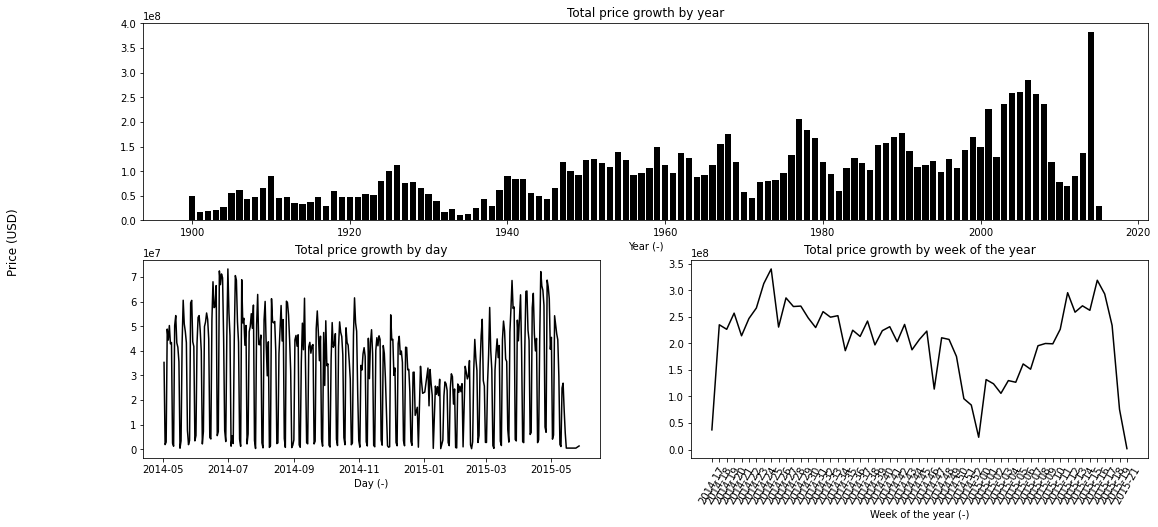

In [21]:
def question_one(dataset):
    per_yr = dataset[['id','yr_built']].groupby('yr_built').count()
    per_yr.rename(columns={'id':'Number of properties'}, inplace=True)
    per_yr.index.name = 'Construction year'
    print("Number of properties per construction year:\n\n")
    print(per_yr)
    
    return per_yr

def question_two(dataset):
    min_bed_yr = dataset[['bedrooms','yr_built']].groupby('yr_built').min()
    min_bed_yr.rename(columns={'bedrooms':'Number of bedrooms'}, inplace=True)
    min_bed_yr.index.name = 'Construction year'
    print("\n\nThe smallest number of bedrooms per construction year:\n\n")
    print(min_bed_yr)
    
    return min_bed_yr

def question_three(data):
    max_price_bed = data[['price','bedrooms']].groupby('bedrooms').max()
    max_price_bed.index.name = 'Number of bedrooms'
    print("\n\nThe highest price of a property per number of bedrooms:\n\n")
    print(max_price_bed)
    
    return max_price_bed

def question_four(data):
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    sum_price_bed = data[['price','bedrooms']].groupby('bedrooms').sum()
    sum_price_bed.rename(columns={'price':'Sum of prices'}, inplace=True)
    sum_price_bed.index.name = 'Number of bedrooms'
    print("\n\nThe sum of the prices per number of bedrooms:\n\n")
    print(sum_price_bed)
    
    return sum_price_bed

def question_five(data):
    bed_bath = data[['price','bedrooms','bathrooms']].groupby(['bedrooms','bathrooms']).sum()
    bed_bath.rename(columns={'price':'Sum of prices'}, inplace=True)
    print("\n\nThe sum of the prices per number of bedrooms and bathrooms:\n\n")
    print(bed_bath)
    
    return bed_bath

def question_six(dataset):
    mean_liv = dataset[['sqft_living','yr_built']].groupby('yr_built').mean()
    mean_liv.rename(columns={'sqft_living': "Living room average area"}, inplace=True)
    mean_liv.index.name = "Construction year"
    print("\n\nLiving room average area per construction year:\n\n")
    print(mean_liv)
    
    return mean_liv

def question_seven(dataset):
    median_liv = dataset[['sqft_living','yr_built']].groupby('yr_built').median()
    median_liv.rename(columns={'sqft_living': "Living room median area"}, inplace=True)
    median_liv.index.name = "Construction year"
    print("\n\nLiving room median area per construction year:\n\n")
    print(median_liv)
    
    return median_liv

def question_eight(dataset):
    std_liv = dataset[['sqft_living','yr_built']].groupby('yr_built').std()
    std_liv.rename(columns={'sqft_living': "Living room standard deviation"}, inplace=True)
    std_liv.index.name = "Construction year"
    print("\n\nLiving room standard deviation per construction year:\n\n")
    print(std_liv)
    
    return std_liv

def question_nine(data):
    print("\n\nDashboard for the total price growth by year, by day and by week of the year:\n")
    fig = plt.figure(figsize=(18,8))
    specs = gridspec.GridSpec(ncols=2,nrows=2,figure=fig)
    
    ax1 = fig.add_subplot(specs[0,:])
    ax2 = fig.add_subplot(specs[1,0])
    ax3 = fig.add_subplot(specs[1,1])
    
    df4 = data.copy()
    df4['yr_built'] = pd.to_datetime(df4['yr_built']).dt.year
    price_year = df4[['price','yr_built']].groupby('yr_built').sum().reset_index()
    ax1.bar(price_year['yr_built'],price_year['price'],color='black')
    ax1.set_xlabel("Year (-)")
    ax1.set_title("Total price growth by year")
    
    price_day = data[['price','date']].groupby('date').sum().reset_index()
    ax2.plot(price_day['date'],price_day['price'],color='black')
    ax2.set_xlabel("Day (-)")
    ax2.set_title("Total price growth by day")
    
    df5 = data.copy()
    df5['date'] = pd.to_datetime(df5['date']).dt.strftime('%Y-%U')
    price_week = df5[['price','date']].groupby('date').sum().reset_index()
    ax3.plot(price_week['date'],price_week['price'],color='black')
    ax3.set_xlabel("Week of the year (-)")
    fig.supylabel("Price (USD)")
    ax3.set_title("Total price growth by week of the year")
    plt.xticks(rotation=60);
    
    return df4, price_day, df5

if __name__ == '__main__':
    
    per_yr = question_one(dataset)
    
    min_bed_yr = question_two(dataset)
    
    max_price_bed = question_three(data)
    
    sum_price_bed = question_four(data)
    
    bed_bath = question_five(data)
    
    mean_liv = question_six(dataset)
    
    median_liv = question_seven(dataset)
    
    std_liv = question_eight(dataset)
    
    df4, price_day, df5 = question_nine(data)

As a solution to the question 10, a map with property size proportional to the price was created and deployed to Heroku: [Property map - property size proportional to the price.](https://size-map-quemelli-lucas.herokuapp.com/)

### 2.1.5. Q&R 5.0

1. Create a column called: dormitory_type.
   - If the value of the column "bedrooms" is equal to 1 => 'studio'.
   - If the value of the column "bedrooms" is equal to 2 => 'apartment'.
   - If the value of the column "bedrooms" is greater than 2 => 'house'.
2. Draw a bar chart: sum of the prices per number of bedrooms.
3. Draw a line chart: average price per construction year.
4. Draw a bar chart: average price per dormitory type.
5. Draw a line chart: average price per renovation year - since 1930.
6. Make a table: average price per construction year and per dormitory type.
7. Create a dashboard with the charts of the questions 02, 03 and 04 (1 row and 3 columns).
8. Create a dashboard with the charts of the questions 02 and 04 (1 row and 2 columns).
9. Create a dashboard with the charts of the questions 03 and 05 (2 rows and 1 column).
10. Create a map with the points proportional to the living room size of the properties. 

Dormitory type column:


0        house
1        house
2    apartment
3        house
4        house
Name: dormitory_type, dtype: object


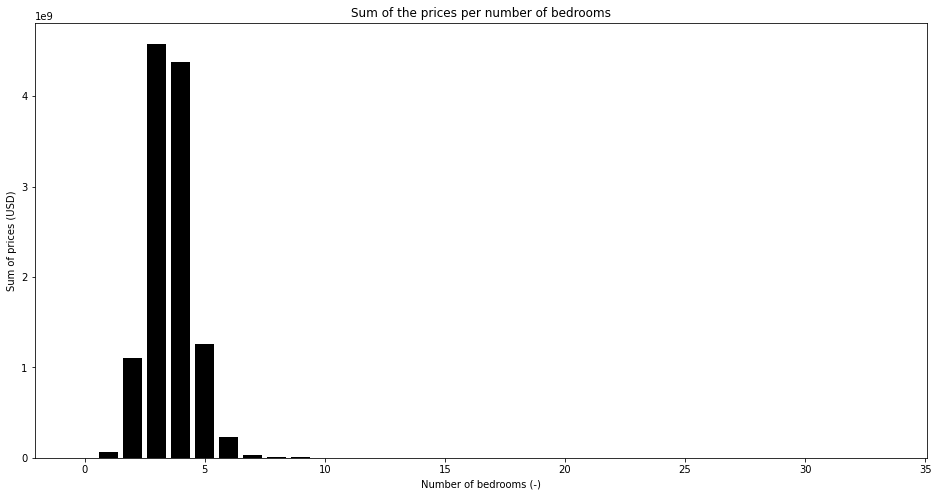

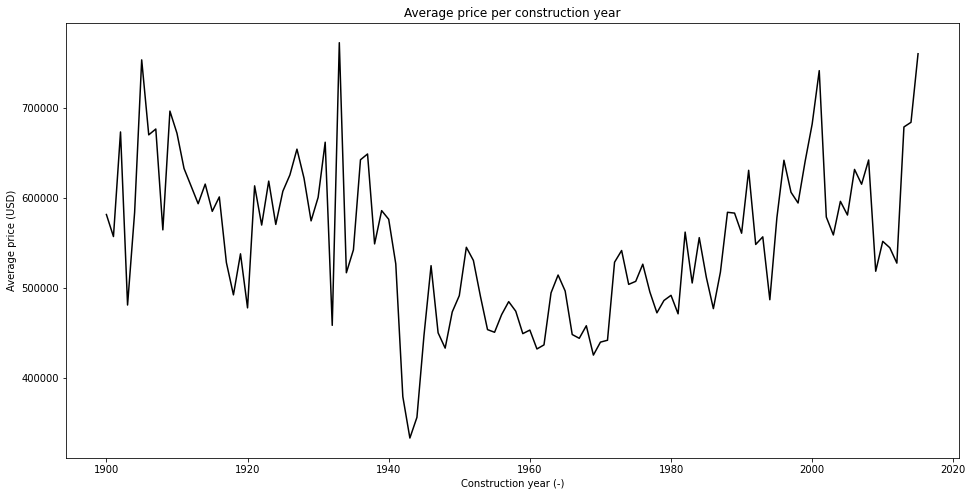



The manner to classify the properties into dormitory type resulted in 'NA' rows (0-bedrooms):

                 Average price
Dormitory type               
NA                  280158.33
apartment           401372.68
house               563092.21
studio              318224.15


A new manner to classify was developed and the result is as follows:

                dormitory_type  Average price
Dormitory type                              
0                   apartment      401372.68
1                       house      563001.17
2                      studio      318224.15


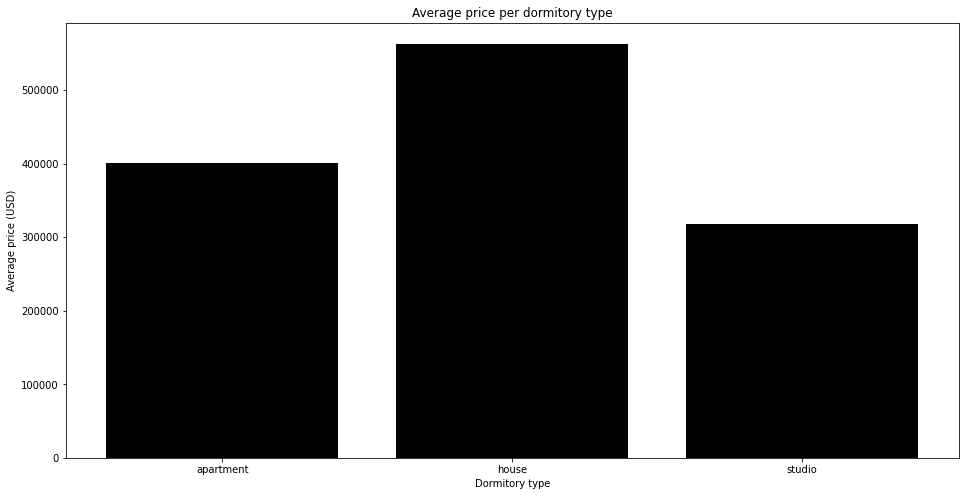

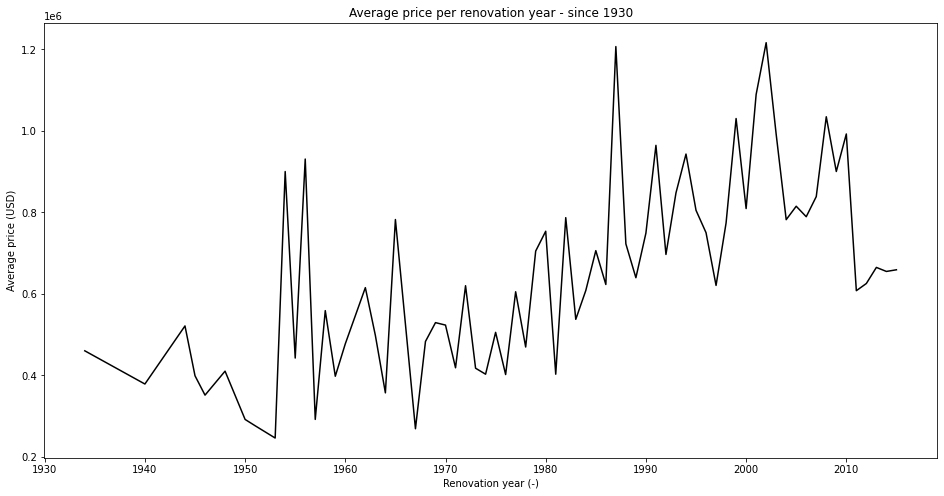



Table 1:

      Construction year Dormitory type  Average price
0                 1900      apartment      589533.33
1                 1900          house      584854.27
2                 1900         studio      398944.00
3                 1901      apartment      452856.40
4                 1901          house      578619.17
..                 ...            ...            ...
299               2014          house      692687.72
300               2014         studio      516500.00
301               2015      apartment      543250.00
302               2015          house      797383.06
303               2015         studio      385195.00

[304 rows x 3 columns]


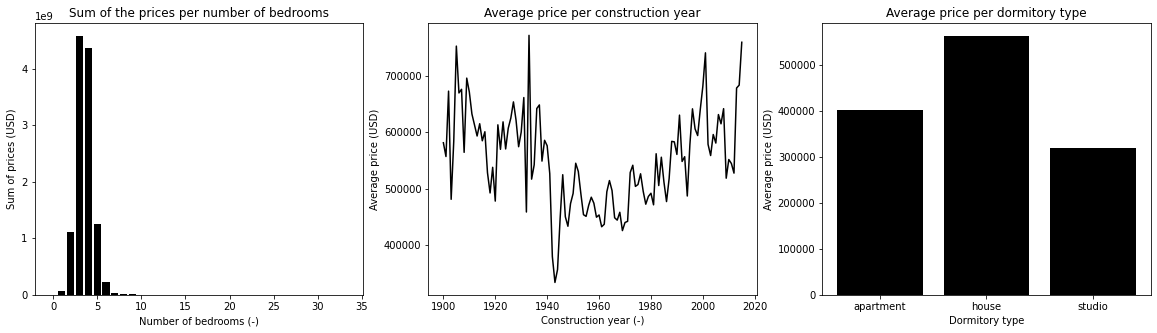

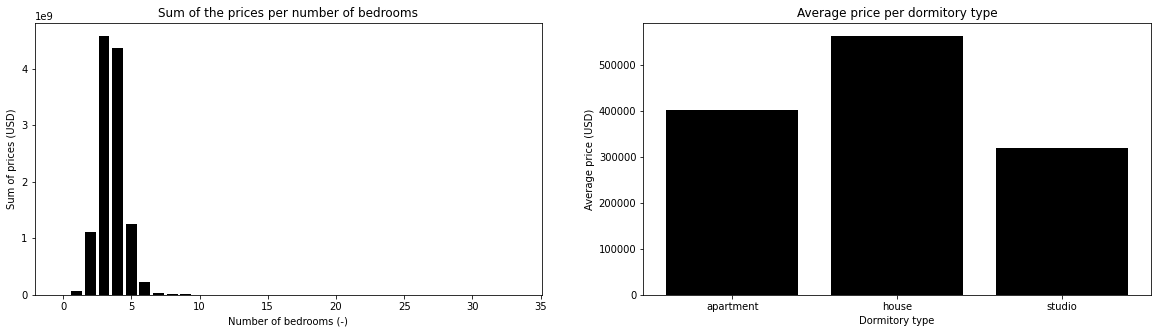

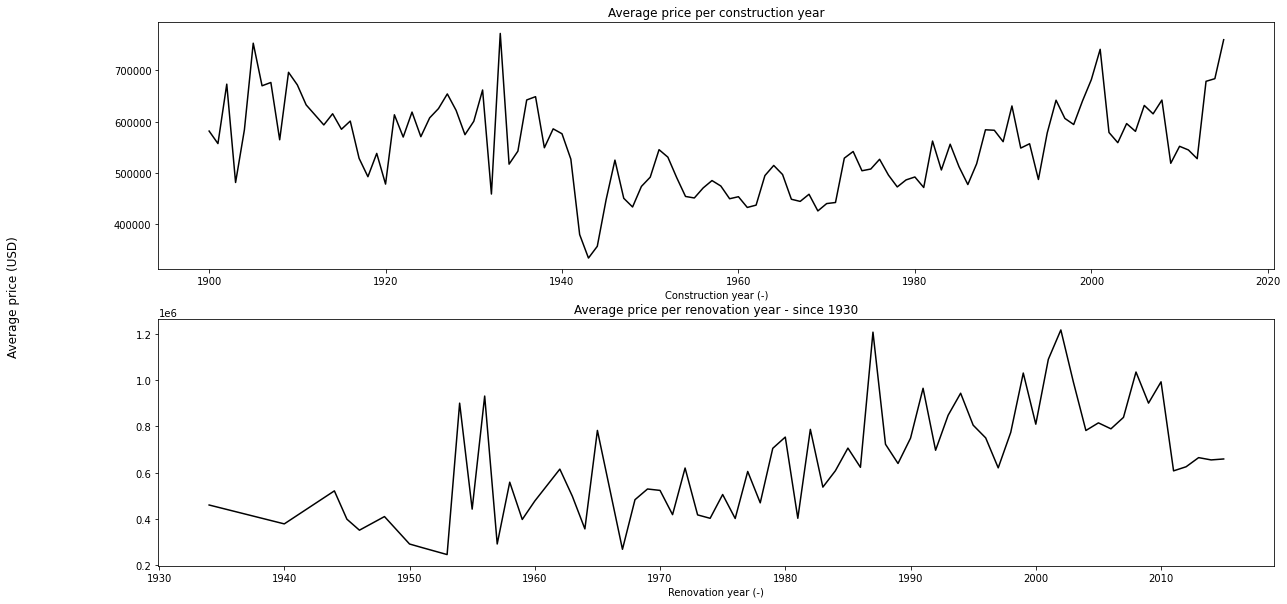

In [22]:
def question_one(data):
    data['dormitory_type'] = 'NA'
    
    data.loc[data['bedrooms'] == 1, 'dormitory_type'] = 'studio'
    data.loc[data['bedrooms'] == 2, 'dormitory_type'] = 'apartment'
    data.loc[data['bedrooms'] > 2 , 'dormitory_type'] = 'house'
    
    print("Dormitory type column:\n\n")
    print(data['dormitory_type'].head())
    
    return data
    
def question_two(data):
    plt.figure(figsize=(16,8))
    price_bed = data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
    
    plt.bar(price_bed['bedrooms'],price_bed['price'],color='black')
    plt.xlabel("Number of bedrooms (-)")
    plt.ylabel("Sum of prices (USD)")
    plt.title("Sum of the prices per number of bedrooms")
    
    plt.show()    
    
    return price_bed

def question_three(data):
    plt.figure(figsize=(16,8))
    price_year = data[['price','yr_built']].groupby('yr_built').mean().reset_index()
    
    
    plt.plot(price_year['yr_built'],price_year['price'],color='black')
    plt.xlabel("Construction year (-)")
    plt.ylabel("Average price (USD)")
    plt.title("Average price per construction year")
    
    plt.show()
    
    return price_year

def question_four(data, dataset):
    avg_price = data[['price','dormitory_type']].groupby('dormitory_type').mean()
    avg_price.rename(columns={'price':'Average price'}, inplace=True)
    avg_price.index.name = 'Dormitory type'
    print("\n\nThe manner to classify the properties into dormitory type resulted in 'NA' rows (0-bedrooms):\n\n", avg_price)
    
    dataset['dormitory_type'] = 'NA'
    dataset['dormitory_type'] = dataset['bedrooms'].apply(lambda x: 'studio' if x == 1 else 'apartment' if x == 2 else 'house')
    
    data['dormitory_type'] = 'NA'
    data['dormitory_type'] = data['bedrooms'].apply(lambda x: 'studio' if x == 1 else 'apartment' if x == 2 else 'house')
    avg_price = data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
    avg_price.rename(columns={'price':'Average price'}, inplace=True)
    avg_price.index.name = 'Dormitory type'
    print("\n\nA new manner to classify was developed and the result is as follows:\n\n", avg_price)
    
    plt.figure(figsize=(16,8))
    plt.bar(avg_price['dormitory_type'], avg_price['Average price'],color='black')
    plt.xlabel("Dormitory type")
    plt.ylabel("Average price (USD)")
    plt.title("Average price per dormitory type")
    
    plt.show()
    
    return avg_price, data, dataset

def question_five(dataset):
    avg_ren = dataset.loc[dataset['yr_renovated'] >= 1930, ['price','yr_renovated']].groupby('yr_renovated').mean().reset_index()
    
    plt.figure(figsize=(16,8))
    plt.plot(avg_ren['yr_renovated'], avg_ren['price'], color='black')
    plt.xlabel("Renovation year (-)")
    plt.ylabel("Average price (USD)")
    plt.title("Average price per renovation year - since 1930")
    
    plt.show()
    
    return avg_ren

def question_six(dataset):
    built_dorm = dataset[['price','yr_built','dormitory_type']].groupby(['yr_built','dormitory_type']).mean().reset_index()
    built_dorm.rename(columns={"price": "Average price", "yr_built": "Construction year", 
                               "dormitory_type": "Dormitory type"}, inplace=True)
    print("\n\nTable 1:\n\n",built_dorm)
    
    return built_dorm

def question_seven(data):
    fig = plt.figure(figsize=(20,5))
    specs = gridspec.GridSpec(ncols=3,nrows=1,figure=fig)
    
    ax1 = fig.add_subplot(specs[0,0])
    ax2 = fig.add_subplot(specs[0,1])
    ax3 = fig.add_subplot(specs[0,2])
    
    price_bed = data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
    ax1.bar(price_bed['bedrooms'],price_bed['price'],color='black')
    ax1.set_xlabel("Number of bedrooms (-)")
    ax1.set_ylabel("Sum of prices (USD)")
    ax1.set_title("Sum of the prices per number of bedrooms")
    
    price_year = data[['price','yr_built']].groupby('yr_built').mean().reset_index()
    ax2.plot(price_year['yr_built'],price_year['price'],color='black')
    ax2.set_xlabel("Construction year (-)")
    ax2.set_ylabel("Average price (USD)")
    ax2.set_title("Average price per construction year")
    
    avg_price = data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
    ax3.bar(avg_price['dormitory_type'], avg_price['price'],color='black')
    ax3.set_xlabel("Dormitory type")
    ax3.set_ylabel("Average price (USD)")
    ax3.set_title("Average price per dormitory type")
    
    return price_bed, price_year, avg_price

def question_eight(data):
    fig = plt.figure(figsize=(20,5))
    specs = gridspec.GridSpec(ncols=2,nrows=1,figure=fig)
    
    ax1 = fig.add_subplot(specs[0,0])
    ax2 = fig.add_subplot(specs[0,1])
    
    price_bed = data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
    ax1.bar(price_bed['bedrooms'],price_bed['price'],color='black')
    ax1.set_xlabel("Number of bedrooms (-)")
    ax1.set_ylabel("Sum of prices (USD)")
    ax1.set_title("Sum of the prices per number of bedrooms")
    
    avg_price = data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
    ax2.bar(avg_price['dormitory_type'], avg_price['price'],color='black')
    ax2.set_xlabel("Dormitory type")
    ax2.set_ylabel("Average price (USD)")
    ax2.set_title("Average price per dormitory type")
    
    return price_bed, avg_price

def question_nine(data):
    fig = plt.figure(figsize=(20,10))
    specs = gridspec.GridSpec(ncols=1,nrows=2,figure=fig)
    
    ax1 = fig.add_subplot(specs[0,0])
    ax2 = fig.add_subplot(specs[1,0])
    
    price_year = data[['price','yr_built']].groupby('yr_built').mean().reset_index()
    ax1.plot(price_year['yr_built'],price_year['price'],color='black')
    ax1.set_xlabel("Construction year (-)")
    ax1.set_title("Average price per construction year")
    
    avg_ren = dataset.loc[dataset['yr_renovated'] >= 1930, ['price','yr_renovated']].groupby('yr_renovated').mean().reset_index()
    ax2.plot(avg_ren['yr_renovated'], avg_ren['price'], color='black')
    ax2.set_xlabel("Renovation year (-)")
    ax2.set_title("Average price per renovation year - since 1930")
    fig.supylabel("Average price (USD)")
    
    return price_year, avg_ren

if __name__ == '__main__':
    data = question_one(data)
    
    price_bed = question_two(data)
    
    price_year = question_three(data)
    
    agv_price, data, dataset = question_four(data, dataset)
    
    avg_ren = question_five(dataset)
    
    built_dorm = question_six(dataset)
    
    price_bed, price_year, avg_price = question_seven(data)
    
    price_bed, avg_price = question_eight(data)
    
    price_year, avg_ren = question_nine(data)

As a solution to the question 10, a map with property size proportional to the living room size was created and deployed to Heroku: [Property map - property size proportional to the living room.](https://lrsize-map-quemelli.herokuapp.com/)

### 2.1.6. Q&R 6.0

1. How many properties per level?
   - Level 0: price between 0.00 and 321.950
   - Level 1: price between 321.950 and 450.000
   - Level 2: price between 450.000 and 645.000
   - Level 3: price above 645.000
2. Add the following information to the properties:
   - Street;
   - Number;
   - Neighbourhood;
   - City;
   - State.
3. Add the level of the price as a color in the map.
4. Make the points proportional to the price in the map.
5. Add filters to the map:
   - Water view or not;
   - Value of the price.
6. Add a filter to the last dashboard:
   - Show values only from a specific date.

In [23]:
def question_one(data):
    data['level'] = 'NA'
    
    for i in range(len(data)):
        if (data.loc[i, 'price'] >= 0) & (data.loc[i, 'price'] < 321950):
            data.loc[i, 'level'] = 'level_0'
            
        elif (data.loc[i, 'price'] >= 321950) & (data.loc[i, 'price'] < 450000):
            data.loc[i, 'level'] = 'level_1'
            
        elif (data.loc[i, 'price'] >= 450000) & (data.loc[i, 'price'] < 645000):
            data.loc[i, 'level'] = 'level_2'
            
        else:
            data.loc[i, 'level'] = 'level_3'
    print("Column level:\n\n",data['level'])
    
    return data

def question_two(data):
    data['road'] = 'NA'
    data['house_number'] = 'NA'
    data['neighbourhood'] = 'NA'
    data['city'] = 'NA'
    data['county'] = 'NA'
    data['state'] = 'NA'
    
    print("\n\nNew columns created:\n\n",data.head())
    
    geolocator = Nominatim(user_agent='geoapiExercises')
    
    for i in range(len(data)):
        print("Loop {}/{}".format(i,len(data)))
        
        query = str(data.loc[i, 'lat']) + ',' + str(data.loc[i, 'long'])
        response = geolocator.reverse(query)
        
        if 'road' in response.raw['address']:
            data.loc[i, 'road'] = response.raw['address']['road']
            
        if 'house_number' in response.raw['address']:
            data.loc[i, 'house_number'] = response.raw['address']['house_number']
            
        if 'neighbourhood' in response.raw['address']:
            data.loc[i, 'neighbourhood'] = response.raw['address']['neighbourhood']
            
        if 'city' in response.raw['address']:
            data.loc[i, 'city'] = response.raw['address']['city']
            
        if 'county' in response.raw['address']:
            data.loc[i, 'county'] = response.raw['address']['county']
            
        if 'state' in response.raw['address']:
            data.loc[i, 'state'] = response.raw['address']['state']
            
    return data        

if __name__ == '__main__':
    data = question_one(data)
    
    data = question_two(data)

Column level:

 0        level_0
1        level_2
2        level_0
3        level_2
4        level_2
          ...   
21598    level_1
21599    level_1
21600    level_1
21601    level_1
21602    level_1
Name: level, Length: 21603, dtype: object


New columns created:

            id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221900.00         3       1.00         1180   
1  6414100192 2014-12-09 538000.00         3       2.25         2570   
2  5631500400 2015-02-25 180000.00         2       1.00          770   
3  2487200875 2014-12-09 604000.00         4       3.00         1960   
4  1954400510 2015-02-18 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  house_age  dormitory_type  \
0      5650    1.00           0     0  ...  new_house           house   
1      7242    2.00           0     0  ...  new_house           house   
2     10000    1.00           0     0  ...  new_house       apartment   
3    

Loop 441/21603
Loop 442/21603
Loop 443/21603
Loop 444/21603
Loop 445/21603
Loop 446/21603
Loop 447/21603
Loop 448/21603
Loop 449/21603
Loop 450/21603
Loop 451/21603
Loop 452/21603
Loop 453/21603
Loop 454/21603
Loop 455/21603
Loop 456/21603
Loop 457/21603
Loop 458/21603
Loop 459/21603
Loop 460/21603
Loop 461/21603
Loop 462/21603
Loop 463/21603
Loop 464/21603
Loop 465/21603
Loop 466/21603
Loop 467/21603
Loop 468/21603
Loop 469/21603
Loop 470/21603
Loop 471/21603
Loop 472/21603
Loop 473/21603
Loop 474/21603
Loop 475/21603
Loop 476/21603
Loop 477/21603
Loop 478/21603
Loop 479/21603
Loop 480/21603
Loop 481/21603
Loop 482/21603
Loop 483/21603
Loop 484/21603
Loop 485/21603
Loop 486/21603
Loop 487/21603
Loop 488/21603
Loop 489/21603
Loop 490/21603
Loop 491/21603
Loop 492/21603
Loop 493/21603
Loop 494/21603
Loop 495/21603
Loop 496/21603
Loop 497/21603
Loop 498/21603
Loop 499/21603
Loop 500/21603
Loop 501/21603
Loop 502/21603
Loop 503/21603
Loop 504/21603
Loop 505/21603
Loop 506/21603
Loop 507/2

Loop 988/21603
Loop 989/21603
Loop 990/21603
Loop 991/21603
Loop 992/21603
Loop 993/21603
Loop 994/21603
Loop 995/21603
Loop 996/21603
Loop 997/21603
Loop 998/21603
Loop 999/21603
Loop 1000/21603
Loop 1001/21603
Loop 1002/21603
Loop 1003/21603
Loop 1004/21603
Loop 1005/21603
Loop 1006/21603
Loop 1007/21603
Loop 1008/21603
Loop 1009/21603
Loop 1010/21603
Loop 1011/21603
Loop 1012/21603
Loop 1013/21603
Loop 1014/21603
Loop 1015/21603
Loop 1016/21603
Loop 1017/21603
Loop 1018/21603
Loop 1019/21603
Loop 1020/21603
Loop 1021/21603
Loop 1022/21603
Loop 1023/21603
Loop 1024/21603
Loop 1025/21603
Loop 1026/21603
Loop 1027/21603
Loop 1028/21603
Loop 1029/21603
Loop 1030/21603
Loop 1031/21603
Loop 1032/21603
Loop 1033/21603
Loop 1034/21603
Loop 1035/21603
Loop 1036/21603
Loop 1037/21603
Loop 1038/21603
Loop 1039/21603
Loop 1040/21603
Loop 1041/21603
Loop 1042/21603
Loop 1043/21603
Loop 1044/21603
Loop 1045/21603
Loop 1046/21603
Loop 1047/21603
Loop 1048/21603
Loop 1049/21603
Loop 1050/21603
Loop

Loop 1501/21603
Loop 1502/21603
Loop 1503/21603
Loop 1504/21603
Loop 1505/21603
Loop 1506/21603
Loop 1507/21603
Loop 1508/21603
Loop 1509/21603
Loop 1510/21603
Loop 1511/21603
Loop 1512/21603
Loop 1513/21603
Loop 1514/21603
Loop 1515/21603
Loop 1516/21603
Loop 1517/21603
Loop 1518/21603
Loop 1519/21603
Loop 1520/21603
Loop 1521/21603
Loop 1522/21603
Loop 1523/21603
Loop 1524/21603
Loop 1525/21603
Loop 1526/21603
Loop 1527/21603
Loop 1528/21603
Loop 1529/21603
Loop 1530/21603
Loop 1531/21603
Loop 1532/21603
Loop 1533/21603
Loop 1534/21603
Loop 1535/21603
Loop 1536/21603
Loop 1537/21603
Loop 1538/21603
Loop 1539/21603
Loop 1540/21603
Loop 1541/21603
Loop 1542/21603
Loop 1543/21603
Loop 1544/21603
Loop 1545/21603
Loop 1546/21603
Loop 1547/21603
Loop 1548/21603
Loop 1549/21603
Loop 1550/21603
Loop 1551/21603
Loop 1552/21603
Loop 1553/21603
Loop 1554/21603
Loop 1555/21603
Loop 1556/21603
Loop 1557/21603
Loop 1558/21603
Loop 1559/21603
Loop 1560/21603
Loop 1561/21603
Loop 1562/21603
Loop 156

Loop 2014/21603
Loop 2015/21603
Loop 2016/21603
Loop 2017/21603
Loop 2018/21603
Loop 2019/21603
Loop 2020/21603
Loop 2021/21603
Loop 2022/21603
Loop 2023/21603
Loop 2024/21603
Loop 2025/21603
Loop 2026/21603
Loop 2027/21603
Loop 2028/21603
Loop 2029/21603
Loop 2030/21603
Loop 2031/21603
Loop 2032/21603
Loop 2033/21603
Loop 2034/21603
Loop 2035/21603
Loop 2036/21603
Loop 2037/21603
Loop 2038/21603
Loop 2039/21603
Loop 2040/21603
Loop 2041/21603
Loop 2042/21603
Loop 2043/21603
Loop 2044/21603
Loop 2045/21603
Loop 2046/21603
Loop 2047/21603
Loop 2048/21603
Loop 2049/21603
Loop 2050/21603
Loop 2051/21603
Loop 2052/21603
Loop 2053/21603
Loop 2054/21603
Loop 2055/21603
Loop 2056/21603
Loop 2057/21603
Loop 2058/21603
Loop 2059/21603
Loop 2060/21603
Loop 2061/21603
Loop 2062/21603
Loop 2063/21603
Loop 2064/21603
Loop 2065/21603
Loop 2066/21603
Loop 2067/21603
Loop 2068/21603
Loop 2069/21603
Loop 2070/21603
Loop 2071/21603
Loop 2072/21603
Loop 2073/21603
Loop 2074/21603
Loop 2075/21603
Loop 207

Loop 2527/21603
Loop 2528/21603
Loop 2529/21603
Loop 2530/21603
Loop 2531/21603
Loop 2532/21603
Loop 2533/21603
Loop 2534/21603
Loop 2535/21603
Loop 2536/21603
Loop 2537/21603
Loop 2538/21603
Loop 2539/21603
Loop 2540/21603
Loop 2541/21603
Loop 2542/21603
Loop 2543/21603
Loop 2544/21603
Loop 2545/21603
Loop 2546/21603
Loop 2547/21603
Loop 2548/21603
Loop 2549/21603
Loop 2550/21603
Loop 2551/21603
Loop 2552/21603
Loop 2553/21603
Loop 2554/21603
Loop 2555/21603
Loop 2556/21603
Loop 2557/21603
Loop 2558/21603
Loop 2559/21603
Loop 2560/21603
Loop 2561/21603
Loop 2562/21603
Loop 2563/21603
Loop 2564/21603
Loop 2565/21603
Loop 2566/21603
Loop 2567/21603
Loop 2568/21603
Loop 2569/21603
Loop 2570/21603
Loop 2571/21603
Loop 2572/21603
Loop 2573/21603
Loop 2574/21603
Loop 2575/21603
Loop 2576/21603
Loop 2577/21603
Loop 2578/21603
Loop 2579/21603
Loop 2580/21603
Loop 2581/21603
Loop 2582/21603
Loop 2583/21603
Loop 2584/21603
Loop 2585/21603
Loop 2586/21603
Loop 2587/21603
Loop 2588/21603
Loop 258

Loop 3040/21603
Loop 3041/21603
Loop 3042/21603
Loop 3043/21603
Loop 3044/21603
Loop 3045/21603
Loop 3046/21603
Loop 3047/21603
Loop 3048/21603
Loop 3049/21603
Loop 3050/21603
Loop 3051/21603
Loop 3052/21603
Loop 3053/21603
Loop 3054/21603
Loop 3055/21603
Loop 3056/21603
Loop 3057/21603
Loop 3058/21603
Loop 3059/21603
Loop 3060/21603
Loop 3061/21603
Loop 3062/21603
Loop 3063/21603
Loop 3064/21603
Loop 3065/21603
Loop 3066/21603
Loop 3067/21603
Loop 3068/21603
Loop 3069/21603
Loop 3070/21603
Loop 3071/21603
Loop 3072/21603
Loop 3073/21603
Loop 3074/21603
Loop 3075/21603
Loop 3076/21603
Loop 3077/21603
Loop 3078/21603
Loop 3079/21603
Loop 3080/21603
Loop 3081/21603
Loop 3082/21603
Loop 3083/21603
Loop 3084/21603
Loop 3085/21603
Loop 3086/21603
Loop 3087/21603
Loop 3088/21603
Loop 3089/21603
Loop 3090/21603
Loop 3091/21603
Loop 3092/21603
Loop 3093/21603
Loop 3094/21603
Loop 3095/21603
Loop 3096/21603
Loop 3097/21603
Loop 3098/21603
Loop 3099/21603
Loop 3100/21603
Loop 3101/21603
Loop 310

Loop 3553/21603
Loop 3554/21603
Loop 3555/21603
Loop 3556/21603
Loop 3557/21603
Loop 3558/21603
Loop 3559/21603
Loop 3560/21603
Loop 3561/21603
Loop 3562/21603
Loop 3563/21603
Loop 3564/21603
Loop 3565/21603
Loop 3566/21603
Loop 3567/21603
Loop 3568/21603
Loop 3569/21603
Loop 3570/21603
Loop 3571/21603
Loop 3572/21603
Loop 3573/21603
Loop 3574/21603
Loop 3575/21603
Loop 3576/21603
Loop 3577/21603
Loop 3578/21603
Loop 3579/21603
Loop 3580/21603
Loop 3581/21603
Loop 3582/21603
Loop 3583/21603
Loop 3584/21603
Loop 3585/21603
Loop 3586/21603
Loop 3587/21603
Loop 3588/21603
Loop 3589/21603
Loop 3590/21603
Loop 3591/21603
Loop 3592/21603
Loop 3593/21603
Loop 3594/21603
Loop 3595/21603
Loop 3596/21603
Loop 3597/21603
Loop 3598/21603
Loop 3599/21603
Loop 3600/21603
Loop 3601/21603
Loop 3602/21603
Loop 3603/21603
Loop 3604/21603
Loop 3605/21603
Loop 3606/21603
Loop 3607/21603
Loop 3608/21603
Loop 3609/21603
Loop 3610/21603
Loop 3611/21603
Loop 3612/21603
Loop 3613/21603
Loop 3614/21603
Loop 361

Loop 4066/21603
Loop 4067/21603
Loop 4068/21603
Loop 4069/21603
Loop 4070/21603
Loop 4071/21603
Loop 4072/21603
Loop 4073/21603
Loop 4074/21603
Loop 4075/21603
Loop 4076/21603
Loop 4077/21603
Loop 4078/21603
Loop 4079/21603
Loop 4080/21603
Loop 4081/21603
Loop 4082/21603
Loop 4083/21603
Loop 4084/21603
Loop 4085/21603
Loop 4086/21603
Loop 4087/21603
Loop 4088/21603
Loop 4089/21603
Loop 4090/21603
Loop 4091/21603
Loop 4092/21603
Loop 4093/21603
Loop 4094/21603
Loop 4095/21603
Loop 4096/21603
Loop 4097/21603
Loop 4098/21603
Loop 4099/21603
Loop 4100/21603
Loop 4101/21603
Loop 4102/21603
Loop 4103/21603
Loop 4104/21603
Loop 4105/21603
Loop 4106/21603
Loop 4107/21603
Loop 4108/21603
Loop 4109/21603
Loop 4110/21603
Loop 4111/21603
Loop 4112/21603
Loop 4113/21603
Loop 4114/21603
Loop 4115/21603
Loop 4116/21603
Loop 4117/21603
Loop 4118/21603
Loop 4119/21603
Loop 4120/21603
Loop 4121/21603
Loop 4122/21603
Loop 4123/21603
Loop 4124/21603
Loop 4125/21603
Loop 4126/21603
Loop 4127/21603
Loop 412

Loop 4579/21603
Loop 4580/21603
Loop 4581/21603
Loop 4582/21603
Loop 4583/21603
Loop 4584/21603
Loop 4585/21603
Loop 4586/21603
Loop 4587/21603
Loop 4588/21603
Loop 4589/21603
Loop 4590/21603
Loop 4591/21603
Loop 4592/21603
Loop 4593/21603
Loop 4594/21603
Loop 4595/21603
Loop 4596/21603
Loop 4597/21603
Loop 4598/21603
Loop 4599/21603
Loop 4600/21603
Loop 4601/21603
Loop 4602/21603
Loop 4603/21603
Loop 4604/21603
Loop 4605/21603
Loop 4606/21603
Loop 4607/21603
Loop 4608/21603
Loop 4609/21603
Loop 4610/21603
Loop 4611/21603
Loop 4612/21603
Loop 4613/21603
Loop 4614/21603
Loop 4615/21603
Loop 4616/21603
Loop 4617/21603
Loop 4618/21603
Loop 4619/21603
Loop 4620/21603
Loop 4621/21603
Loop 4622/21603
Loop 4623/21603
Loop 4624/21603
Loop 4625/21603
Loop 4626/21603
Loop 4627/21603
Loop 4628/21603
Loop 4629/21603
Loop 4630/21603
Loop 4631/21603
Loop 4632/21603
Loop 4633/21603
Loop 4634/21603
Loop 4635/21603
Loop 4636/21603
Loop 4637/21603
Loop 4638/21603
Loop 4639/21603
Loop 4640/21603
Loop 464

Loop 5092/21603
Loop 5093/21603
Loop 5094/21603
Loop 5095/21603
Loop 5096/21603
Loop 5097/21603
Loop 5098/21603
Loop 5099/21603
Loop 5100/21603
Loop 5101/21603
Loop 5102/21603
Loop 5103/21603
Loop 5104/21603
Loop 5105/21603
Loop 5106/21603
Loop 5107/21603
Loop 5108/21603
Loop 5109/21603
Loop 5110/21603
Loop 5111/21603
Loop 5112/21603
Loop 5113/21603
Loop 5114/21603
Loop 5115/21603
Loop 5116/21603
Loop 5117/21603
Loop 5118/21603
Loop 5119/21603
Loop 5120/21603
Loop 5121/21603
Loop 5122/21603
Loop 5123/21603
Loop 5124/21603
Loop 5125/21603
Loop 5126/21603
Loop 5127/21603
Loop 5128/21603
Loop 5129/21603
Loop 5130/21603
Loop 5131/21603
Loop 5132/21603
Loop 5133/21603
Loop 5134/21603
Loop 5135/21603
Loop 5136/21603
Loop 5137/21603
Loop 5138/21603
Loop 5139/21603
Loop 5140/21603
Loop 5141/21603
Loop 5142/21603
Loop 5143/21603
Loop 5144/21603
Loop 5145/21603
Loop 5146/21603
Loop 5147/21603
Loop 5148/21603
Loop 5149/21603
Loop 5150/21603
Loop 5151/21603
Loop 5152/21603
Loop 5153/21603
Loop 515

Loop 5605/21603
Loop 5606/21603
Loop 5607/21603
Loop 5608/21603
Loop 5609/21603
Loop 5610/21603
Loop 5611/21603
Loop 5612/21603
Loop 5613/21603
Loop 5614/21603
Loop 5615/21603
Loop 5616/21603
Loop 5617/21603
Loop 5618/21603
Loop 5619/21603
Loop 5620/21603
Loop 5621/21603
Loop 5622/21603
Loop 5623/21603
Loop 5624/21603
Loop 5625/21603
Loop 5626/21603
Loop 5627/21603
Loop 5628/21603
Loop 5629/21603
Loop 5630/21603
Loop 5631/21603
Loop 5632/21603
Loop 5633/21603
Loop 5634/21603
Loop 5635/21603
Loop 5636/21603
Loop 5637/21603
Loop 5638/21603
Loop 5639/21603
Loop 5640/21603
Loop 5641/21603
Loop 5642/21603
Loop 5643/21603
Loop 5644/21603
Loop 5645/21603
Loop 5646/21603
Loop 5647/21603
Loop 5648/21603
Loop 5649/21603
Loop 5650/21603
Loop 5651/21603
Loop 5652/21603
Loop 5653/21603
Loop 5654/21603
Loop 5655/21603
Loop 5656/21603
Loop 5657/21603
Loop 5658/21603
Loop 5659/21603
Loop 5660/21603
Loop 5661/21603
Loop 5662/21603
Loop 5663/21603
Loop 5664/21603
Loop 5665/21603
Loop 5666/21603
Loop 566

Loop 6118/21603
Loop 6119/21603
Loop 6120/21603
Loop 6121/21603
Loop 6122/21603
Loop 6123/21603
Loop 6124/21603
Loop 6125/21603
Loop 6126/21603
Loop 6127/21603
Loop 6128/21603
Loop 6129/21603
Loop 6130/21603
Loop 6131/21603
Loop 6132/21603
Loop 6133/21603
Loop 6134/21603
Loop 6135/21603
Loop 6136/21603
Loop 6137/21603
Loop 6138/21603
Loop 6139/21603
Loop 6140/21603
Loop 6141/21603
Loop 6142/21603
Loop 6143/21603
Loop 6144/21603
Loop 6145/21603
Loop 6146/21603
Loop 6147/21603
Loop 6148/21603
Loop 6149/21603
Loop 6150/21603
Loop 6151/21603
Loop 6152/21603
Loop 6153/21603
Loop 6154/21603
Loop 6155/21603
Loop 6156/21603
Loop 6157/21603
Loop 6158/21603
Loop 6159/21603
Loop 6160/21603
Loop 6161/21603
Loop 6162/21603
Loop 6163/21603
Loop 6164/21603
Loop 6165/21603
Loop 6166/21603
Loop 6167/21603
Loop 6168/21603
Loop 6169/21603
Loop 6170/21603
Loop 6171/21603
Loop 6172/21603
Loop 6173/21603
Loop 6174/21603
Loop 6175/21603
Loop 6176/21603
Loop 6177/21603
Loop 6178/21603
Loop 6179/21603
Loop 618

Loop 6631/21603
Loop 6632/21603
Loop 6633/21603
Loop 6634/21603
Loop 6635/21603
Loop 6636/21603
Loop 6637/21603
Loop 6638/21603
Loop 6639/21603
Loop 6640/21603
Loop 6641/21603
Loop 6642/21603
Loop 6643/21603
Loop 6644/21603
Loop 6645/21603
Loop 6646/21603
Loop 6647/21603
Loop 6648/21603
Loop 6649/21603
Loop 6650/21603
Loop 6651/21603
Loop 6652/21603
Loop 6653/21603
Loop 6654/21603
Loop 6655/21603
Loop 6656/21603
Loop 6657/21603
Loop 6658/21603
Loop 6659/21603
Loop 6660/21603
Loop 6661/21603
Loop 6662/21603
Loop 6663/21603
Loop 6664/21603
Loop 6665/21603
Loop 6666/21603
Loop 6667/21603
Loop 6668/21603
Loop 6669/21603
Loop 6670/21603
Loop 6671/21603
Loop 6672/21603
Loop 6673/21603
Loop 6674/21603
Loop 6675/21603
Loop 6676/21603
Loop 6677/21603
Loop 6678/21603
Loop 6679/21603
Loop 6680/21603
Loop 6681/21603
Loop 6682/21603
Loop 6683/21603
Loop 6684/21603
Loop 6685/21603
Loop 6686/21603
Loop 6687/21603
Loop 6688/21603
Loop 6689/21603
Loop 6690/21603
Loop 6691/21603
Loop 6692/21603
Loop 669

Loop 7144/21603
Loop 7145/21603
Loop 7146/21603
Loop 7147/21603
Loop 7148/21603
Loop 7149/21603
Loop 7150/21603
Loop 7151/21603
Loop 7152/21603
Loop 7153/21603
Loop 7154/21603
Loop 7155/21603
Loop 7156/21603
Loop 7157/21603
Loop 7158/21603
Loop 7159/21603
Loop 7160/21603
Loop 7161/21603
Loop 7162/21603
Loop 7163/21603
Loop 7164/21603
Loop 7165/21603
Loop 7166/21603
Loop 7167/21603
Loop 7168/21603
Loop 7169/21603
Loop 7170/21603
Loop 7171/21603
Loop 7172/21603
Loop 7173/21603
Loop 7174/21603
Loop 7175/21603
Loop 7176/21603
Loop 7177/21603
Loop 7178/21603
Loop 7179/21603
Loop 7180/21603
Loop 7181/21603
Loop 7182/21603
Loop 7183/21603
Loop 7184/21603
Loop 7185/21603
Loop 7186/21603
Loop 7187/21603
Loop 7188/21603
Loop 7189/21603
Loop 7190/21603
Loop 7191/21603
Loop 7192/21603
Loop 7193/21603
Loop 7194/21603
Loop 7195/21603
Loop 7196/21603
Loop 7197/21603
Loop 7198/21603
Loop 7199/21603
Loop 7200/21603
Loop 7201/21603
Loop 7202/21603
Loop 7203/21603
Loop 7204/21603
Loop 7205/21603
Loop 720

Loop 7657/21603
Loop 7658/21603
Loop 7659/21603
Loop 7660/21603
Loop 7661/21603
Loop 7662/21603
Loop 7663/21603
Loop 7664/21603
Loop 7665/21603
Loop 7666/21603
Loop 7667/21603
Loop 7668/21603
Loop 7669/21603
Loop 7670/21603
Loop 7671/21603
Loop 7672/21603
Loop 7673/21603
Loop 7674/21603
Loop 7675/21603
Loop 7676/21603
Loop 7677/21603
Loop 7678/21603
Loop 7679/21603
Loop 7680/21603
Loop 7681/21603
Loop 7682/21603
Loop 7683/21603
Loop 7684/21603
Loop 7685/21603
Loop 7686/21603
Loop 7687/21603
Loop 7688/21603
Loop 7689/21603
Loop 7690/21603
Loop 7691/21603
Loop 7692/21603
Loop 7693/21603
Loop 7694/21603
Loop 7695/21603
Loop 7696/21603
Loop 7697/21603
Loop 7698/21603
Loop 7699/21603
Loop 7700/21603
Loop 7701/21603
Loop 7702/21603
Loop 7703/21603
Loop 7704/21603
Loop 7705/21603
Loop 7706/21603
Loop 7707/21603
Loop 7708/21603
Loop 7709/21603
Loop 7710/21603
Loop 7711/21603
Loop 7712/21603
Loop 7713/21603
Loop 7714/21603
Loop 7715/21603
Loop 7716/21603
Loop 7717/21603
Loop 7718/21603
Loop 771

Loop 8170/21603
Loop 8171/21603
Loop 8172/21603
Loop 8173/21603
Loop 8174/21603
Loop 8175/21603
Loop 8176/21603
Loop 8177/21603
Loop 8178/21603
Loop 8179/21603
Loop 8180/21603
Loop 8181/21603
Loop 8182/21603
Loop 8183/21603
Loop 8184/21603
Loop 8185/21603
Loop 8186/21603
Loop 8187/21603
Loop 8188/21603
Loop 8189/21603
Loop 8190/21603
Loop 8191/21603
Loop 8192/21603
Loop 8193/21603
Loop 8194/21603
Loop 8195/21603
Loop 8196/21603
Loop 8197/21603
Loop 8198/21603
Loop 8199/21603
Loop 8200/21603
Loop 8201/21603
Loop 8202/21603
Loop 8203/21603
Loop 8204/21603
Loop 8205/21603
Loop 8206/21603
Loop 8207/21603
Loop 8208/21603
Loop 8209/21603
Loop 8210/21603
Loop 8211/21603
Loop 8212/21603
Loop 8213/21603
Loop 8214/21603
Loop 8215/21603
Loop 8216/21603
Loop 8217/21603
Loop 8218/21603
Loop 8219/21603
Loop 8220/21603
Loop 8221/21603
Loop 8222/21603
Loop 8223/21603
Loop 8224/21603
Loop 8225/21603
Loop 8226/21603
Loop 8227/21603
Loop 8228/21603
Loop 8229/21603
Loop 8230/21603
Loop 8231/21603
Loop 823

Loop 8683/21603
Loop 8684/21603
Loop 8685/21603
Loop 8686/21603
Loop 8687/21603
Loop 8688/21603
Loop 8689/21603
Loop 8690/21603
Loop 8691/21603
Loop 8692/21603
Loop 8693/21603
Loop 8694/21603
Loop 8695/21603
Loop 8696/21603
Loop 8697/21603
Loop 8698/21603
Loop 8699/21603
Loop 8700/21603
Loop 8701/21603
Loop 8702/21603
Loop 8703/21603
Loop 8704/21603
Loop 8705/21603
Loop 8706/21603
Loop 8707/21603
Loop 8708/21603
Loop 8709/21603
Loop 8710/21603
Loop 8711/21603
Loop 8712/21603
Loop 8713/21603
Loop 8714/21603
Loop 8715/21603
Loop 8716/21603
Loop 8717/21603
Loop 8718/21603
Loop 8719/21603
Loop 8720/21603
Loop 8721/21603
Loop 8722/21603
Loop 8723/21603
Loop 8724/21603
Loop 8725/21603
Loop 8726/21603
Loop 8727/21603
Loop 8728/21603
Loop 8729/21603
Loop 8730/21603
Loop 8731/21603
Loop 8732/21603
Loop 8733/21603
Loop 8734/21603
Loop 8735/21603
Loop 8736/21603
Loop 8737/21603
Loop 8738/21603
Loop 8739/21603
Loop 8740/21603
Loop 8741/21603
Loop 8742/21603
Loop 8743/21603
Loop 8744/21603
Loop 874

Loop 9196/21603
Loop 9197/21603
Loop 9198/21603
Loop 9199/21603
Loop 9200/21603
Loop 9201/21603
Loop 9202/21603
Loop 9203/21603
Loop 9204/21603
Loop 9205/21603
Loop 9206/21603
Loop 9207/21603
Loop 9208/21603
Loop 9209/21603
Loop 9210/21603
Loop 9211/21603
Loop 9212/21603
Loop 9213/21603
Loop 9214/21603
Loop 9215/21603
Loop 9216/21603
Loop 9217/21603
Loop 9218/21603
Loop 9219/21603
Loop 9220/21603
Loop 9221/21603
Loop 9222/21603
Loop 9223/21603
Loop 9224/21603
Loop 9225/21603
Loop 9226/21603
Loop 9227/21603
Loop 9228/21603
Loop 9229/21603
Loop 9230/21603
Loop 9231/21603
Loop 9232/21603
Loop 9233/21603
Loop 9234/21603
Loop 9235/21603
Loop 9236/21603
Loop 9237/21603
Loop 9238/21603
Loop 9239/21603
Loop 9240/21603
Loop 9241/21603
Loop 9242/21603
Loop 9243/21603
Loop 9244/21603
Loop 9245/21603
Loop 9246/21603
Loop 9247/21603
Loop 9248/21603
Loop 9249/21603
Loop 9250/21603
Loop 9251/21603
Loop 9252/21603
Loop 9253/21603
Loop 9254/21603
Loop 9255/21603
Loop 9256/21603
Loop 9257/21603
Loop 925

Loop 9709/21603
Loop 9710/21603
Loop 9711/21603
Loop 9712/21603
Loop 9713/21603
Loop 9714/21603
Loop 9715/21603
Loop 9716/21603
Loop 9717/21603
Loop 9718/21603
Loop 9719/21603
Loop 9720/21603
Loop 9721/21603
Loop 9722/21603
Loop 9723/21603
Loop 9724/21603
Loop 9725/21603
Loop 9726/21603
Loop 9727/21603
Loop 9728/21603
Loop 9729/21603
Loop 9730/21603
Loop 9731/21603
Loop 9732/21603
Loop 9733/21603
Loop 9734/21603
Loop 9735/21603
Loop 9736/21603
Loop 9737/21603
Loop 9738/21603
Loop 9739/21603
Loop 9740/21603
Loop 9741/21603
Loop 9742/21603
Loop 9743/21603
Loop 9744/21603
Loop 9745/21603
Loop 9746/21603
Loop 9747/21603
Loop 9748/21603
Loop 9749/21603
Loop 9750/21603
Loop 9751/21603
Loop 9752/21603
Loop 9753/21603
Loop 9754/21603
Loop 9755/21603
Loop 9756/21603
Loop 9757/21603
Loop 9758/21603
Loop 9759/21603
Loop 9760/21603
Loop 9761/21603
Loop 9762/21603
Loop 9763/21603
Loop 9764/21603
Loop 9765/21603
Loop 9766/21603
Loop 9767/21603
Loop 9768/21603
Loop 9769/21603
Loop 9770/21603
Loop 977

Loop 10209/21603
Loop 10210/21603
Loop 10211/21603
Loop 10212/21603
Loop 10213/21603
Loop 10214/21603
Loop 10215/21603
Loop 10216/21603
Loop 10217/21603
Loop 10218/21603
Loop 10219/21603
Loop 10220/21603
Loop 10221/21603
Loop 10222/21603
Loop 10223/21603
Loop 10224/21603
Loop 10225/21603
Loop 10226/21603
Loop 10227/21603
Loop 10228/21603
Loop 10229/21603
Loop 10230/21603
Loop 10231/21603
Loop 10232/21603
Loop 10233/21603
Loop 10234/21603
Loop 10235/21603
Loop 10236/21603
Loop 10237/21603
Loop 10238/21603
Loop 10239/21603
Loop 10240/21603
Loop 10241/21603
Loop 10242/21603
Loop 10243/21603
Loop 10244/21603
Loop 10245/21603
Loop 10246/21603
Loop 10247/21603
Loop 10248/21603
Loop 10249/21603
Loop 10250/21603
Loop 10251/21603
Loop 10252/21603
Loop 10253/21603
Loop 10254/21603
Loop 10255/21603
Loop 10256/21603
Loop 10257/21603
Loop 10258/21603
Loop 10259/21603
Loop 10260/21603
Loop 10261/21603
Loop 10262/21603
Loop 10263/21603
Loop 10264/21603
Loop 10265/21603
Loop 10266/21603
Loop 10267/216

Loop 10691/21603
Loop 10692/21603
Loop 10693/21603
Loop 10694/21603
Loop 10695/21603
Loop 10696/21603
Loop 10697/21603
Loop 10698/21603
Loop 10699/21603
Loop 10700/21603
Loop 10701/21603
Loop 10702/21603
Loop 10703/21603
Loop 10704/21603
Loop 10705/21603
Loop 10706/21603
Loop 10707/21603
Loop 10708/21603
Loop 10709/21603
Loop 10710/21603
Loop 10711/21603
Loop 10712/21603
Loop 10713/21603
Loop 10714/21603
Loop 10715/21603
Loop 10716/21603
Loop 10717/21603
Loop 10718/21603
Loop 10719/21603
Loop 10720/21603
Loop 10721/21603
Loop 10722/21603
Loop 10723/21603
Loop 10724/21603
Loop 10725/21603
Loop 10726/21603
Loop 10727/21603
Loop 10728/21603
Loop 10729/21603
Loop 10730/21603
Loop 10731/21603
Loop 10732/21603
Loop 10733/21603
Loop 10734/21603
Loop 10735/21603
Loop 10736/21603
Loop 10737/21603
Loop 10738/21603
Loop 10739/21603
Loop 10740/21603
Loop 10741/21603
Loop 10742/21603
Loop 10743/21603
Loop 10744/21603
Loop 10745/21603
Loop 10746/21603
Loop 10747/21603
Loop 10748/21603
Loop 10749/216

Loop 11173/21603
Loop 11174/21603
Loop 11175/21603
Loop 11176/21603
Loop 11177/21603
Loop 11178/21603
Loop 11179/21603
Loop 11180/21603
Loop 11181/21603
Loop 11182/21603
Loop 11183/21603
Loop 11184/21603
Loop 11185/21603
Loop 11186/21603
Loop 11187/21603
Loop 11188/21603
Loop 11189/21603
Loop 11190/21603
Loop 11191/21603
Loop 11192/21603
Loop 11193/21603
Loop 11194/21603
Loop 11195/21603
Loop 11196/21603
Loop 11197/21603
Loop 11198/21603
Loop 11199/21603
Loop 11200/21603
Loop 11201/21603
Loop 11202/21603
Loop 11203/21603
Loop 11204/21603
Loop 11205/21603
Loop 11206/21603
Loop 11207/21603
Loop 11208/21603
Loop 11209/21603
Loop 11210/21603
Loop 11211/21603
Loop 11212/21603
Loop 11213/21603
Loop 11214/21603
Loop 11215/21603
Loop 11216/21603
Loop 11217/21603
Loop 11218/21603
Loop 11219/21603
Loop 11220/21603
Loop 11221/21603
Loop 11222/21603
Loop 11223/21603
Loop 11224/21603
Loop 11225/21603
Loop 11226/21603
Loop 11227/21603
Loop 11228/21603
Loop 11229/21603
Loop 11230/21603
Loop 11231/216

Loop 11655/21603
Loop 11656/21603
Loop 11657/21603
Loop 11658/21603
Loop 11659/21603
Loop 11660/21603
Loop 11661/21603
Loop 11662/21603
Loop 11663/21603
Loop 11664/21603
Loop 11665/21603
Loop 11666/21603
Loop 11667/21603
Loop 11668/21603
Loop 11669/21603
Loop 11670/21603
Loop 11671/21603
Loop 11672/21603
Loop 11673/21603
Loop 11674/21603
Loop 11675/21603
Loop 11676/21603
Loop 11677/21603
Loop 11678/21603
Loop 11679/21603
Loop 11680/21603
Loop 11681/21603
Loop 11682/21603
Loop 11683/21603
Loop 11684/21603
Loop 11685/21603
Loop 11686/21603
Loop 11687/21603
Loop 11688/21603
Loop 11689/21603
Loop 11690/21603
Loop 11691/21603
Loop 11692/21603
Loop 11693/21603
Loop 11694/21603
Loop 11695/21603
Loop 11696/21603
Loop 11697/21603
Loop 11698/21603
Loop 11699/21603
Loop 11700/21603
Loop 11701/21603
Loop 11702/21603
Loop 11703/21603
Loop 11704/21603
Loop 11705/21603
Loop 11706/21603
Loop 11707/21603
Loop 11708/21603
Loop 11709/21603
Loop 11710/21603
Loop 11711/21603
Loop 11712/21603
Loop 11713/216

Loop 12137/21603
Loop 12138/21603
Loop 12139/21603
Loop 12140/21603
Loop 12141/21603
Loop 12142/21603
Loop 12143/21603
Loop 12144/21603
Loop 12145/21603
Loop 12146/21603
Loop 12147/21603
Loop 12148/21603
Loop 12149/21603
Loop 12150/21603
Loop 12151/21603
Loop 12152/21603
Loop 12153/21603
Loop 12154/21603
Loop 12155/21603
Loop 12156/21603
Loop 12157/21603
Loop 12158/21603
Loop 12159/21603
Loop 12160/21603
Loop 12161/21603
Loop 12162/21603
Loop 12163/21603
Loop 12164/21603
Loop 12165/21603
Loop 12166/21603
Loop 12167/21603
Loop 12168/21603
Loop 12169/21603
Loop 12170/21603
Loop 12171/21603
Loop 12172/21603
Loop 12173/21603
Loop 12174/21603
Loop 12175/21603
Loop 12176/21603
Loop 12177/21603
Loop 12178/21603
Loop 12179/21603
Loop 12180/21603
Loop 12181/21603
Loop 12182/21603
Loop 12183/21603
Loop 12184/21603
Loop 12185/21603
Loop 12186/21603
Loop 12187/21603
Loop 12188/21603
Loop 12189/21603
Loop 12190/21603
Loop 12191/21603
Loop 12192/21603
Loop 12193/21603
Loop 12194/21603
Loop 12195/216

Loop 12619/21603
Loop 12620/21603
Loop 12621/21603
Loop 12622/21603
Loop 12623/21603
Loop 12624/21603
Loop 12625/21603
Loop 12626/21603
Loop 12627/21603
Loop 12628/21603
Loop 12629/21603
Loop 12630/21603
Loop 12631/21603
Loop 12632/21603
Loop 12633/21603
Loop 12634/21603
Loop 12635/21603
Loop 12636/21603
Loop 12637/21603
Loop 12638/21603
Loop 12639/21603
Loop 12640/21603
Loop 12641/21603
Loop 12642/21603
Loop 12643/21603
Loop 12644/21603
Loop 12645/21603
Loop 12646/21603
Loop 12647/21603
Loop 12648/21603
Loop 12649/21603
Loop 12650/21603
Loop 12651/21603
Loop 12652/21603
Loop 12653/21603
Loop 12654/21603
Loop 12655/21603
Loop 12656/21603
Loop 12657/21603
Loop 12658/21603
Loop 12659/21603
Loop 12660/21603
Loop 12661/21603
Loop 12662/21603
Loop 12663/21603
Loop 12664/21603
Loop 12665/21603
Loop 12666/21603
Loop 12667/21603
Loop 12668/21603
Loop 12669/21603
Loop 12670/21603
Loop 12671/21603
Loop 12672/21603
Loop 12673/21603
Loop 12674/21603
Loop 12675/21603
Loop 12676/21603
Loop 12677/216

Loop 13101/21603
Loop 13102/21603
Loop 13103/21603
Loop 13104/21603
Loop 13105/21603
Loop 13106/21603
Loop 13107/21603
Loop 13108/21603
Loop 13109/21603
Loop 13110/21603
Loop 13111/21603
Loop 13112/21603
Loop 13113/21603
Loop 13114/21603
Loop 13115/21603
Loop 13116/21603
Loop 13117/21603
Loop 13118/21603
Loop 13119/21603
Loop 13120/21603
Loop 13121/21603
Loop 13122/21603
Loop 13123/21603
Loop 13124/21603
Loop 13125/21603
Loop 13126/21603
Loop 13127/21603
Loop 13128/21603
Loop 13129/21603
Loop 13130/21603
Loop 13131/21603
Loop 13132/21603
Loop 13133/21603
Loop 13134/21603
Loop 13135/21603
Loop 13136/21603
Loop 13137/21603
Loop 13138/21603
Loop 13139/21603
Loop 13140/21603
Loop 13141/21603
Loop 13142/21603
Loop 13143/21603
Loop 13144/21603
Loop 13145/21603
Loop 13146/21603
Loop 13147/21603
Loop 13148/21603
Loop 13149/21603
Loop 13150/21603
Loop 13151/21603
Loop 13152/21603
Loop 13153/21603
Loop 13154/21603
Loop 13155/21603
Loop 13156/21603
Loop 13157/21603
Loop 13158/21603
Loop 13159/216

Loop 13583/21603
Loop 13584/21603
Loop 13585/21603
Loop 13586/21603
Loop 13587/21603
Loop 13588/21603
Loop 13589/21603
Loop 13590/21603
Loop 13591/21603
Loop 13592/21603
Loop 13593/21603
Loop 13594/21603
Loop 13595/21603
Loop 13596/21603
Loop 13597/21603
Loop 13598/21603
Loop 13599/21603
Loop 13600/21603
Loop 13601/21603
Loop 13602/21603
Loop 13603/21603
Loop 13604/21603
Loop 13605/21603
Loop 13606/21603
Loop 13607/21603
Loop 13608/21603
Loop 13609/21603
Loop 13610/21603
Loop 13611/21603
Loop 13612/21603
Loop 13613/21603
Loop 13614/21603
Loop 13615/21603
Loop 13616/21603
Loop 13617/21603
Loop 13618/21603
Loop 13619/21603
Loop 13620/21603
Loop 13621/21603
Loop 13622/21603
Loop 13623/21603
Loop 13624/21603
Loop 13625/21603
Loop 13626/21603
Loop 13627/21603
Loop 13628/21603
Loop 13629/21603
Loop 13630/21603
Loop 13631/21603
Loop 13632/21603
Loop 13633/21603
Loop 13634/21603
Loop 13635/21603
Loop 13636/21603
Loop 13637/21603
Loop 13638/21603
Loop 13639/21603
Loop 13640/21603
Loop 13641/216

Loop 14065/21603
Loop 14066/21603
Loop 14067/21603
Loop 14068/21603
Loop 14069/21603
Loop 14070/21603
Loop 14071/21603
Loop 14072/21603
Loop 14073/21603
Loop 14074/21603
Loop 14075/21603
Loop 14076/21603
Loop 14077/21603
Loop 14078/21603
Loop 14079/21603
Loop 14080/21603
Loop 14081/21603
Loop 14082/21603
Loop 14083/21603
Loop 14084/21603
Loop 14085/21603
Loop 14086/21603
Loop 14087/21603
Loop 14088/21603
Loop 14089/21603
Loop 14090/21603
Loop 14091/21603
Loop 14092/21603
Loop 14093/21603
Loop 14094/21603
Loop 14095/21603
Loop 14096/21603
Loop 14097/21603
Loop 14098/21603
Loop 14099/21603
Loop 14100/21603
Loop 14101/21603
Loop 14102/21603
Loop 14103/21603
Loop 14104/21603
Loop 14105/21603
Loop 14106/21603
Loop 14107/21603
Loop 14108/21603
Loop 14109/21603
Loop 14110/21603
Loop 14111/21603
Loop 14112/21603
Loop 14113/21603
Loop 14114/21603
Loop 14115/21603
Loop 14116/21603
Loop 14117/21603
Loop 14118/21603
Loop 14119/21603
Loop 14120/21603
Loop 14121/21603
Loop 14122/21603
Loop 14123/216

Loop 14547/21603
Loop 14548/21603
Loop 14549/21603
Loop 14550/21603
Loop 14551/21603
Loop 14552/21603
Loop 14553/21603
Loop 14554/21603
Loop 14555/21603
Loop 14556/21603
Loop 14557/21603
Loop 14558/21603
Loop 14559/21603
Loop 14560/21603
Loop 14561/21603
Loop 14562/21603
Loop 14563/21603
Loop 14564/21603
Loop 14565/21603
Loop 14566/21603
Loop 14567/21603
Loop 14568/21603
Loop 14569/21603
Loop 14570/21603
Loop 14571/21603
Loop 14572/21603
Loop 14573/21603
Loop 14574/21603
Loop 14575/21603
Loop 14576/21603
Loop 14577/21603
Loop 14578/21603
Loop 14579/21603
Loop 14580/21603
Loop 14581/21603
Loop 14582/21603
Loop 14583/21603
Loop 14584/21603
Loop 14585/21603
Loop 14586/21603
Loop 14587/21603
Loop 14588/21603
Loop 14589/21603
Loop 14590/21603
Loop 14591/21603
Loop 14592/21603
Loop 14593/21603
Loop 14594/21603
Loop 14595/21603
Loop 14596/21603
Loop 14597/21603
Loop 14598/21603
Loop 14599/21603
Loop 14600/21603
Loop 14601/21603
Loop 14602/21603
Loop 14603/21603
Loop 14604/21603
Loop 14605/216

Loop 15029/21603
Loop 15030/21603
Loop 15031/21603
Loop 15032/21603
Loop 15033/21603
Loop 15034/21603
Loop 15035/21603
Loop 15036/21603
Loop 15037/21603
Loop 15038/21603
Loop 15039/21603
Loop 15040/21603
Loop 15041/21603
Loop 15042/21603
Loop 15043/21603
Loop 15044/21603
Loop 15045/21603
Loop 15046/21603
Loop 15047/21603
Loop 15048/21603
Loop 15049/21603
Loop 15050/21603
Loop 15051/21603
Loop 15052/21603
Loop 15053/21603
Loop 15054/21603
Loop 15055/21603
Loop 15056/21603
Loop 15057/21603
Loop 15058/21603
Loop 15059/21603
Loop 15060/21603
Loop 15061/21603
Loop 15062/21603
Loop 15063/21603
Loop 15064/21603
Loop 15065/21603
Loop 15066/21603
Loop 15067/21603
Loop 15068/21603
Loop 15069/21603
Loop 15070/21603
Loop 15071/21603
Loop 15072/21603
Loop 15073/21603
Loop 15074/21603
Loop 15075/21603
Loop 15076/21603
Loop 15077/21603
Loop 15078/21603
Loop 15079/21603
Loop 15080/21603
Loop 15081/21603
Loop 15082/21603
Loop 15083/21603
Loop 15084/21603
Loop 15085/21603
Loop 15086/21603
Loop 15087/216

Loop 15511/21603
Loop 15512/21603
Loop 15513/21603
Loop 15514/21603
Loop 15515/21603
Loop 15516/21603
Loop 15517/21603
Loop 15518/21603
Loop 15519/21603
Loop 15520/21603
Loop 15521/21603
Loop 15522/21603
Loop 15523/21603
Loop 15524/21603
Loop 15525/21603
Loop 15526/21603
Loop 15527/21603
Loop 15528/21603
Loop 15529/21603
Loop 15530/21603
Loop 15531/21603
Loop 15532/21603
Loop 15533/21603
Loop 15534/21603
Loop 15535/21603
Loop 15536/21603
Loop 15537/21603
Loop 15538/21603
Loop 15539/21603
Loop 15540/21603
Loop 15541/21603
Loop 15542/21603
Loop 15543/21603
Loop 15544/21603
Loop 15545/21603
Loop 15546/21603
Loop 15547/21603
Loop 15548/21603
Loop 15549/21603
Loop 15550/21603
Loop 15551/21603
Loop 15552/21603
Loop 15553/21603
Loop 15554/21603
Loop 15555/21603
Loop 15556/21603
Loop 15557/21603
Loop 15558/21603
Loop 15559/21603
Loop 15560/21603
Loop 15561/21603
Loop 15562/21603
Loop 15563/21603
Loop 15564/21603
Loop 15565/21603
Loop 15566/21603
Loop 15567/21603
Loop 15568/21603
Loop 15569/216

Loop 15993/21603
Loop 15994/21603
Loop 15995/21603
Loop 15996/21603
Loop 15997/21603
Loop 15998/21603
Loop 15999/21603
Loop 16000/21603
Loop 16001/21603
Loop 16002/21603
Loop 16003/21603
Loop 16004/21603
Loop 16005/21603
Loop 16006/21603
Loop 16007/21603
Loop 16008/21603
Loop 16009/21603
Loop 16010/21603
Loop 16011/21603
Loop 16012/21603
Loop 16013/21603
Loop 16014/21603
Loop 16015/21603
Loop 16016/21603
Loop 16017/21603
Loop 16018/21603
Loop 16019/21603
Loop 16020/21603
Loop 16021/21603
Loop 16022/21603
Loop 16023/21603
Loop 16024/21603
Loop 16025/21603
Loop 16026/21603
Loop 16027/21603
Loop 16028/21603
Loop 16029/21603
Loop 16030/21603
Loop 16031/21603
Loop 16032/21603
Loop 16033/21603
Loop 16034/21603
Loop 16035/21603
Loop 16036/21603
Loop 16037/21603
Loop 16038/21603
Loop 16039/21603
Loop 16040/21603
Loop 16041/21603
Loop 16042/21603
Loop 16043/21603
Loop 16044/21603
Loop 16045/21603
Loop 16046/21603
Loop 16047/21603
Loop 16048/21603
Loop 16049/21603
Loop 16050/21603
Loop 16051/216

Loop 16475/21603
Loop 16476/21603
Loop 16477/21603
Loop 16478/21603
Loop 16479/21603
Loop 16480/21603
Loop 16481/21603
Loop 16482/21603
Loop 16483/21603
Loop 16484/21603
Loop 16485/21603
Loop 16486/21603
Loop 16487/21603
Loop 16488/21603
Loop 16489/21603
Loop 16490/21603
Loop 16491/21603
Loop 16492/21603
Loop 16493/21603
Loop 16494/21603
Loop 16495/21603
Loop 16496/21603
Loop 16497/21603
Loop 16498/21603
Loop 16499/21603
Loop 16500/21603
Loop 16501/21603
Loop 16502/21603
Loop 16503/21603
Loop 16504/21603
Loop 16505/21603
Loop 16506/21603
Loop 16507/21603
Loop 16508/21603
Loop 16509/21603
Loop 16510/21603
Loop 16511/21603
Loop 16512/21603
Loop 16513/21603
Loop 16514/21603
Loop 16515/21603
Loop 16516/21603
Loop 16517/21603
Loop 16518/21603
Loop 16519/21603
Loop 16520/21603
Loop 16521/21603
Loop 16522/21603
Loop 16523/21603
Loop 16524/21603
Loop 16525/21603
Loop 16526/21603
Loop 16527/21603
Loop 16528/21603
Loop 16529/21603
Loop 16530/21603
Loop 16531/21603
Loop 16532/21603
Loop 16533/216

Loop 16957/21603
Loop 16958/21603
Loop 16959/21603
Loop 16960/21603
Loop 16961/21603
Loop 16962/21603
Loop 16963/21603
Loop 16964/21603
Loop 16965/21603
Loop 16966/21603
Loop 16967/21603
Loop 16968/21603
Loop 16969/21603
Loop 16970/21603
Loop 16971/21603
Loop 16972/21603
Loop 16973/21603
Loop 16974/21603
Loop 16975/21603
Loop 16976/21603
Loop 16977/21603
Loop 16978/21603
Loop 16979/21603
Loop 16980/21603
Loop 16981/21603
Loop 16982/21603
Loop 16983/21603
Loop 16984/21603
Loop 16985/21603
Loop 16986/21603
Loop 16987/21603
Loop 16988/21603
Loop 16989/21603
Loop 16990/21603
Loop 16991/21603
Loop 16992/21603
Loop 16993/21603
Loop 16994/21603
Loop 16995/21603
Loop 16996/21603
Loop 16997/21603
Loop 16998/21603
Loop 16999/21603
Loop 17000/21603
Loop 17001/21603
Loop 17002/21603
Loop 17003/21603
Loop 17004/21603
Loop 17005/21603
Loop 17006/21603
Loop 17007/21603
Loop 17008/21603
Loop 17009/21603
Loop 17010/21603
Loop 17011/21603
Loop 17012/21603
Loop 17013/21603
Loop 17014/21603
Loop 17015/216

Loop 17439/21603
Loop 17440/21603
Loop 17441/21603
Loop 17442/21603
Loop 17443/21603
Loop 17444/21603
Loop 17445/21603
Loop 17446/21603
Loop 17447/21603
Loop 17448/21603
Loop 17449/21603
Loop 17450/21603
Loop 17451/21603
Loop 17452/21603
Loop 17453/21603
Loop 17454/21603
Loop 17455/21603
Loop 17456/21603
Loop 17457/21603
Loop 17458/21603
Loop 17459/21603
Loop 17460/21603
Loop 17461/21603
Loop 17462/21603
Loop 17463/21603
Loop 17464/21603
Loop 17465/21603
Loop 17466/21603
Loop 17467/21603
Loop 17468/21603
Loop 17469/21603
Loop 17470/21603
Loop 17471/21603
Loop 17472/21603
Loop 17473/21603
Loop 17474/21603
Loop 17475/21603
Loop 17476/21603
Loop 17477/21603
Loop 17478/21603
Loop 17479/21603
Loop 17480/21603
Loop 17481/21603
Loop 17482/21603
Loop 17483/21603
Loop 17484/21603
Loop 17485/21603
Loop 17486/21603
Loop 17487/21603
Loop 17488/21603
Loop 17489/21603
Loop 17490/21603
Loop 17491/21603
Loop 17492/21603
Loop 17493/21603
Loop 17494/21603
Loop 17495/21603
Loop 17496/21603
Loop 17497/216

Loop 17921/21603
Loop 17922/21603
Loop 17923/21603
Loop 17924/21603
Loop 17925/21603
Loop 17926/21603
Loop 17927/21603
Loop 17928/21603
Loop 17929/21603
Loop 17930/21603
Loop 17931/21603
Loop 17932/21603
Loop 17933/21603
Loop 17934/21603
Loop 17935/21603
Loop 17936/21603
Loop 17937/21603
Loop 17938/21603
Loop 17939/21603
Loop 17940/21603
Loop 17941/21603
Loop 17942/21603
Loop 17943/21603
Loop 17944/21603
Loop 17945/21603
Loop 17946/21603
Loop 17947/21603
Loop 17948/21603
Loop 17949/21603
Loop 17950/21603
Loop 17951/21603
Loop 17952/21603
Loop 17953/21603
Loop 17954/21603
Loop 17955/21603
Loop 17956/21603
Loop 17957/21603
Loop 17958/21603
Loop 17959/21603
Loop 17960/21603
Loop 17961/21603
Loop 17962/21603
Loop 17963/21603
Loop 17964/21603
Loop 17965/21603
Loop 17966/21603
Loop 17967/21603
Loop 17968/21603
Loop 17969/21603
Loop 17970/21603
Loop 17971/21603
Loop 17972/21603
Loop 17973/21603
Loop 17974/21603
Loop 17975/21603
Loop 17976/21603
Loop 17977/21603
Loop 17978/21603
Loop 17979/216

Loop 18403/21603
Loop 18404/21603
Loop 18405/21603
Loop 18406/21603
Loop 18407/21603
Loop 18408/21603
Loop 18409/21603
Loop 18410/21603
Loop 18411/21603
Loop 18412/21603
Loop 18413/21603
Loop 18414/21603
Loop 18415/21603
Loop 18416/21603
Loop 18417/21603
Loop 18418/21603
Loop 18419/21603
Loop 18420/21603
Loop 18421/21603
Loop 18422/21603
Loop 18423/21603
Loop 18424/21603
Loop 18425/21603
Loop 18426/21603
Loop 18427/21603
Loop 18428/21603
Loop 18429/21603
Loop 18430/21603
Loop 18431/21603
Loop 18432/21603
Loop 18433/21603
Loop 18434/21603
Loop 18435/21603
Loop 18436/21603
Loop 18437/21603
Loop 18438/21603
Loop 18439/21603
Loop 18440/21603
Loop 18441/21603
Loop 18442/21603
Loop 18443/21603
Loop 18444/21603
Loop 18445/21603
Loop 18446/21603
Loop 18447/21603
Loop 18448/21603
Loop 18449/21603
Loop 18450/21603
Loop 18451/21603
Loop 18452/21603
Loop 18453/21603
Loop 18454/21603
Loop 18455/21603
Loop 18456/21603
Loop 18457/21603
Loop 18458/21603
Loop 18459/21603
Loop 18460/21603
Loop 18461/216

Loop 18885/21603
Loop 18886/21603
Loop 18887/21603
Loop 18888/21603
Loop 18889/21603
Loop 18890/21603
Loop 18891/21603
Loop 18892/21603
Loop 18893/21603
Loop 18894/21603
Loop 18895/21603
Loop 18896/21603
Loop 18897/21603
Loop 18898/21603
Loop 18899/21603
Loop 18900/21603
Loop 18901/21603
Loop 18902/21603
Loop 18903/21603
Loop 18904/21603
Loop 18905/21603
Loop 18906/21603
Loop 18907/21603
Loop 18908/21603
Loop 18909/21603
Loop 18910/21603
Loop 18911/21603
Loop 18912/21603
Loop 18913/21603
Loop 18914/21603
Loop 18915/21603
Loop 18916/21603
Loop 18917/21603
Loop 18918/21603
Loop 18919/21603
Loop 18920/21603
Loop 18921/21603
Loop 18922/21603
Loop 18923/21603
Loop 18924/21603
Loop 18925/21603
Loop 18926/21603
Loop 18927/21603
Loop 18928/21603
Loop 18929/21603
Loop 18930/21603
Loop 18931/21603
Loop 18932/21603
Loop 18933/21603
Loop 18934/21603
Loop 18935/21603
Loop 18936/21603
Loop 18937/21603
Loop 18938/21603
Loop 18939/21603
Loop 18940/21603
Loop 18941/21603
Loop 18942/21603
Loop 18943/216

Loop 19367/21603
Loop 19368/21603
Loop 19369/21603
Loop 19370/21603
Loop 19371/21603
Loop 19372/21603
Loop 19373/21603
Loop 19374/21603
Loop 19375/21603
Loop 19376/21603
Loop 19377/21603
Loop 19378/21603
Loop 19379/21603
Loop 19380/21603
Loop 19381/21603
Loop 19382/21603
Loop 19383/21603
Loop 19384/21603
Loop 19385/21603
Loop 19386/21603
Loop 19387/21603
Loop 19388/21603
Loop 19389/21603
Loop 19390/21603
Loop 19391/21603
Loop 19392/21603
Loop 19393/21603
Loop 19394/21603
Loop 19395/21603
Loop 19396/21603
Loop 19397/21603
Loop 19398/21603
Loop 19399/21603
Loop 19400/21603
Loop 19401/21603
Loop 19402/21603
Loop 19403/21603
Loop 19404/21603
Loop 19405/21603
Loop 19406/21603
Loop 19407/21603
Loop 19408/21603
Loop 19409/21603
Loop 19410/21603
Loop 19411/21603
Loop 19412/21603
Loop 19413/21603
Loop 19414/21603
Loop 19415/21603
Loop 19416/21603
Loop 19417/21603
Loop 19418/21603
Loop 19419/21603
Loop 19420/21603
Loop 19421/21603
Loop 19422/21603
Loop 19423/21603
Loop 19424/21603
Loop 19425/216

Loop 19849/21603
Loop 19850/21603
Loop 19851/21603
Loop 19852/21603
Loop 19853/21603
Loop 19854/21603
Loop 19855/21603
Loop 19856/21603
Loop 19857/21603
Loop 19858/21603
Loop 19859/21603
Loop 19860/21603
Loop 19861/21603
Loop 19862/21603
Loop 19863/21603
Loop 19864/21603
Loop 19865/21603
Loop 19866/21603
Loop 19867/21603
Loop 19868/21603
Loop 19869/21603
Loop 19870/21603
Loop 19871/21603
Loop 19872/21603
Loop 19873/21603
Loop 19874/21603
Loop 19875/21603
Loop 19876/21603
Loop 19877/21603
Loop 19878/21603
Loop 19879/21603
Loop 19880/21603
Loop 19881/21603
Loop 19882/21603
Loop 19883/21603
Loop 19884/21603
Loop 19885/21603
Loop 19886/21603
Loop 19887/21603
Loop 19888/21603
Loop 19889/21603
Loop 19890/21603
Loop 19891/21603
Loop 19892/21603
Loop 19893/21603
Loop 19894/21603
Loop 19895/21603
Loop 19896/21603
Loop 19897/21603
Loop 19898/21603
Loop 19899/21603
Loop 19900/21603
Loop 19901/21603
Loop 19902/21603
Loop 19903/21603
Loop 19904/21603
Loop 19905/21603
Loop 19906/21603
Loop 19907/216

Loop 20331/21603
Loop 20332/21603
Loop 20333/21603
Loop 20334/21603
Loop 20335/21603
Loop 20336/21603
Loop 20337/21603
Loop 20338/21603
Loop 20339/21603
Loop 20340/21603
Loop 20341/21603
Loop 20342/21603
Loop 20343/21603
Loop 20344/21603
Loop 20345/21603
Loop 20346/21603
Loop 20347/21603
Loop 20348/21603
Loop 20349/21603
Loop 20350/21603
Loop 20351/21603
Loop 20352/21603
Loop 20353/21603
Loop 20354/21603
Loop 20355/21603
Loop 20356/21603
Loop 20357/21603
Loop 20358/21603
Loop 20359/21603
Loop 20360/21603
Loop 20361/21603
Loop 20362/21603
Loop 20363/21603
Loop 20364/21603
Loop 20365/21603
Loop 20366/21603
Loop 20367/21603
Loop 20368/21603
Loop 20369/21603
Loop 20370/21603
Loop 20371/21603
Loop 20372/21603
Loop 20373/21603
Loop 20374/21603
Loop 20375/21603
Loop 20376/21603
Loop 20377/21603
Loop 20378/21603
Loop 20379/21603
Loop 20380/21603
Loop 20381/21603
Loop 20382/21603
Loop 20383/21603
Loop 20384/21603
Loop 20385/21603
Loop 20386/21603
Loop 20387/21603
Loop 20388/21603
Loop 20389/216

Loop 20813/21603
Loop 20814/21603
Loop 20815/21603
Loop 20816/21603
Loop 20817/21603
Loop 20818/21603
Loop 20819/21603
Loop 20820/21603
Loop 20821/21603
Loop 20822/21603
Loop 20823/21603
Loop 20824/21603
Loop 20825/21603
Loop 20826/21603
Loop 20827/21603
Loop 20828/21603
Loop 20829/21603
Loop 20830/21603
Loop 20831/21603
Loop 20832/21603
Loop 20833/21603
Loop 20834/21603
Loop 20835/21603
Loop 20836/21603
Loop 20837/21603
Loop 20838/21603
Loop 20839/21603
Loop 20840/21603
Loop 20841/21603
Loop 20842/21603
Loop 20843/21603
Loop 20844/21603
Loop 20845/21603
Loop 20846/21603
Loop 20847/21603
Loop 20848/21603
Loop 20849/21603
Loop 20850/21603
Loop 20851/21603
Loop 20852/21603
Loop 20853/21603
Loop 20854/21603
Loop 20855/21603
Loop 20856/21603
Loop 20857/21603
Loop 20858/21603
Loop 20859/21603
Loop 20860/21603
Loop 20861/21603
Loop 20862/21603
Loop 20863/21603
Loop 20864/21603
Loop 20865/21603
Loop 20866/21603
Loop 20867/21603
Loop 20868/21603
Loop 20869/21603
Loop 20870/21603
Loop 20871/216

Loop 21295/21603
Loop 21296/21603
Loop 21297/21603
Loop 21298/21603
Loop 21299/21603
Loop 21300/21603
Loop 21301/21603
Loop 21302/21603
Loop 21303/21603
Loop 21304/21603
Loop 21305/21603
Loop 21306/21603
Loop 21307/21603
Loop 21308/21603
Loop 21309/21603
Loop 21310/21603
Loop 21311/21603
Loop 21312/21603
Loop 21313/21603
Loop 21314/21603
Loop 21315/21603
Loop 21316/21603
Loop 21317/21603
Loop 21318/21603
Loop 21319/21603
Loop 21320/21603
Loop 21321/21603
Loop 21322/21603
Loop 21323/21603
Loop 21324/21603
Loop 21325/21603
Loop 21326/21603
Loop 21327/21603
Loop 21328/21603
Loop 21329/21603
Loop 21330/21603
Loop 21331/21603
Loop 21332/21603
Loop 21333/21603
Loop 21334/21603
Loop 21335/21603
Loop 21336/21603
Loop 21337/21603
Loop 21338/21603
Loop 21339/21603
Loop 21340/21603
Loop 21341/21603
Loop 21342/21603
Loop 21343/21603
Loop 21344/21603
Loop 21345/21603
Loop 21346/21603
Loop 21347/21603
Loop 21348/21603
Loop 21349/21603
Loop 21350/21603
Loop 21351/21603
Loop 21352/21603
Loop 21353/216

The solutions for questions 3, 4, 5 and 6 were deployed to Heroku: [(3, 4 and 5) Property map per waterfront and price; and (6) prices for dates of purchase.](https://filter-map-quemelli.herokuapp.com/)

### 2.1.7. Q&R 7.0

Deploy to Heroku a portfolio as follows:

1. Add filters by region.
2. Choose attributes to visualize.
3. Total number of properties by zipcode, average by zipcode, average living room size by zipcode and average price per square meters by zipcode. 
4. Descriptive analysis for each column.
5. Daily and annual price fluctuation.
6. Properties distributed by: price, number of bedrooms, number of bathrooms, number of floors and waterfront.